# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [688]:
# Import warnings

import warnings
warnings.filterwarnings("ignore")

In [689]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [690]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.24.3
pandas version: 1.5.3
matplotlib version: 3.7.1
seaborn version: 0.12.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [691]:
# Try loading one file

# df = pd.read_parquet('2023-1.parquet')
# df.info()
df = pd.read_parquet('../Datasets and Dictionary/trip_records/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [692]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [693]:
# from google.colab import drive
# drive.mount('/content/drive')

In [694]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('..')
os.chdir('Datasets and Dictionary/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        monthly_data = pd.read_parquet(file_path)
        
        # Ensuring that tpep_pickup_datetime column is having correct type
        monthly_data['tpep_pickup_datetime'] = pd.to_datetime(monthly_data['tpep_pickup_datetime'] )



        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in monthly_data['tpep_pickup_datetime'].dt.date.unique():
            daily_data = monthly_data[monthly_data['tpep_pickup_datetime'].dt.date == date]
        

            # Iterate through each hour of the selected date
            for hour in range(24):
                hourly_data = daily_data[daily_data['tpep_pickup_datetime'].dt.hour == hour]
                
                
                if not hourly_data.empty:
                    # Sample 5% of the hourly data randomly
                    sample = hourly_data.sample(frac = 0.05, random_state = 42)

                    
                    # add data of this hour to the dataframe
                    sampled_data = pd.concat([sampled_data, sample])

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data])

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [695]:
# Store the df in csv/parquet
# df.to_parquet('')

output_path = os.path.join(os.getcwd(), 'yearly_sampled_data.csv')
df.to_parquet(output_path, index=False)

print(f"\n✅ Sampling complete! Combined data saved to {output_path}")


✅ Sampling complete! Combined data saved to /Users/ranjana.g/Documents/AI and ML/Jan AIML/EDA_Assignment/Datasets and Dictionary/trip_records/yearly_sampled_data.csv


## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [696]:
# Load the new data file
df = pd.read_parquet('yearly_sampled_data.csv')


In [697]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-12-01 00:27:51   2023-12-01 00:50:12              1.0   
1         2  2023-12-01 00:38:48   2023-12-01 01:01:55              NaN   
2         2  2023-12-01 00:06:19   2023-12-01 00:16:57              1.0   
3         2  2023-12-01 00:00:50   2023-12-01 00:14:37              NaN   
4         2  2023-12-01 00:16:07   2023-12-01 00:19:17              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.99         1.0                  N           148            50   
1           4.79         NaN               None           231            61   
2           1.05         1.0                  N           161           161   
3           2.08         NaN               None           137           144   
4           0.40         1.0                  N            68            68   

   payment_type  ...  tolls_amount  improvement_surcharge  total_amount  \
0             1  ...           0.0                    1.0         33.96   
1             0  ...           0.0                    1.0         29.43   
2             1  ...           0.0                    1.0         18.84   
3             0  ...           0.0                    1.0         21.22   
4             1  ...           0.0                    1.0         10.10   

   congestion_surcharge  Airport_fee  Airport_Fee  pickup_hour  pickup_month  \
0                   2.5          0.0          NaN          NaN           NaN   
1                   NaN          NaN          NaN          NaN           NaN   
2                   2.5          0.0          NaN          NaN           NaN   
3                   NaN          NaN          NaN          NaN           NaN   
4                   2.5          0.0          NaN          NaN           NaN   

   pickup_day  airport_fee  
0        None          NaN  
1        None          NaN  
2        None          NaN  
3        None          NaN  
4        None          NaN  

[5 rows x 24 columns]

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [698]:
# Fix the index and drop any columns that are not needed

df.reset_index(drop=True, inplace=True)



df.drop(columns=['store_and_fwd_flag'], inplace=True)
df.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-12-01 00:27:51   2023-12-01 00:50:12              1.0   
1         2  2023-12-01 00:38:48   2023-12-01 01:01:55              NaN   
2         2  2023-12-01 00:06:19   2023-12-01 00:16:57              1.0   
3         2  2023-12-01 00:00:50   2023-12-01 00:14:37              NaN   
4         2  2023-12-01 00:16:07   2023-12-01 00:19:17              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           3.99         1.0           148            50             1   
1           4.79         NaN           231            61             0   
2           1.05         1.0           161           161             1   
3           2.08         NaN           137           144             0   
4           0.40         1.0            68            68             1   

   fare_amount  ...  tolls_amount  improvement_surcharge  total_amount  \
0        23.30  ...           0.0                    1.0         33.96   
1        22.43  ...           0.0                    1.0         29.43   
2        10.70  ...           0.0                    1.0         18.84   
3        17.22  ...           0.0                    1.0         21.22   
4         5.10  ...           0.0                    1.0         10.10   

   congestion_surcharge  Airport_fee  Airport_Fee  pickup_hour  pickup_month  \
0                   2.5          0.0          NaN          NaN           NaN   
1                   NaN          NaN          NaN          NaN           NaN   
2                   2.5          0.0          NaN          NaN           NaN   
3                   NaN          NaN          NaN          NaN           NaN   
4                   2.5          0.0          NaN          NaN           NaN   

   pickup_day  airport_fee  
0        None          NaN  
1        None          NaN  
2        None          NaN  
3        None          NaN  
4        None          NaN  

[5 rows x 23 columns]

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [699]:
# Combine the two airport fee columns

# merging two columns by adding the rows with assumption that value will be present only in one of them for a particular row 

df['Airport_Fee'] = df[['Airport_fee', 'airport_fee']].sum(axis=1, skipna=True)

# Drop the original columns
df.drop(['Airport_fee', 'airport_fee'], axis=1, inplace=True)



**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [700]:
# check where values of fare amount are negative

df[df['fare_amount'] < 0]

# There are no negative values in fare_amount

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_Fee, pickup_hour, pickup_month, pickup_day]
Index: []

[0 rows x 21 columns]

Did you notice something different in the `RatecodeID` column for above records?

In [701]:
# Analyse RatecodeID for the negative fare amounts

#There are no negative fare amounts

In [702]:
# Find which columns have negative values

# as tpep_pickup_datetime and tpep_dropoff_datetime are in datetime format , checking negative values for other columns
#negative_columns = df.columns[(df < 0).any()]

#(df.loc[: , ~df.columns.isin(['tpep_pickup_datetime', 'tpep_dropoff_datetime'])] <0).sum()

#df[df.loc[: , ~df.columns.isin(['tpep_pickup_datetime', 'tpep_dropoff_datetime'])] <0]

numeric_cols = df.select_dtypes(include='number')
negative_columns = numeric_cols.columns[(numeric_cols < 0).any()]
print(negative_columns)


Index(['extra', 'mta_tax', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'Airport_Fee'],
      dtype='object')


In [703]:
# fix these negative values

# Dropping the negative values as the counts are very small compared to the whole dataframe

df[negative_columns] = df[negative_columns].abs()
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-12-01 00:27:51   2023-12-01 00:50:12              1.0   
1         2  2023-12-01 00:38:48   2023-12-01 01:01:55              NaN   
2         2  2023-12-01 00:06:19   2023-12-01 00:16:57              1.0   
3         2  2023-12-01 00:00:50   2023-12-01 00:14:37              NaN   
4         2  2023-12-01 00:16:07   2023-12-01 00:19:17              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           3.99         1.0           148            50             1   
1           4.79         NaN           231            61             0   
2           1.05         1.0           161           161             1   
3           2.08         NaN           137           144             0   
4           0.40         1.0            68            68             1   

   fare_amount  ...  mta_tax  tip_amount  tolls_amount  improvement_surcharge  \
0        23.30  ...      0.5        5.66           0.0                    1.0   
1        22.43  ...      0.5        3.00           0.0                    1.0   
2        10.70  ...      0.5        3.14           0.0                    1.0   
3        17.22  ...      0.5        0.00           0.0                    1.0   
4         5.10  ...      0.5        0.00           0.0                    1.0   

   total_amount  congestion_surcharge  Airport_Fee  pickup_hour  pickup_month  \
0         33.96                   2.5          0.0          NaN           NaN   
1         29.43                   NaN          0.0          NaN           NaN   
2         18.84                   2.5          0.0          NaN           NaN   
3         21.22                   NaN          0.0          NaN           NaN   
4         10.10                   2.5          0.0          NaN           NaN   

   pickup_day  
0        None  
1        None  
2        None  
3        None  
4        None  

[5 rows x 21 columns]

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [704]:
# Find the proportion of missing values in each column

df.isnull().sum()

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count            67906
trip_distance                  0
RatecodeID                 67906
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge       67906
Airport_Fee                    0
pickup_hour              1989492
pickup_month             1989492
pickup_day               1989492
dtype: int64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [705]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
df.passenger_count.value_counts()


1.0    1449908
2.0     291975
3.0      72581
4.0      40596
0.0      31247
5.0      25101
6.0      16726
8.0         11
9.0          5
7.0          5
Name: passenger_count, dtype: int64

In [706]:
df.passenger_count.fillna(1.0 , inplace=True)

In [707]:
df.isnull().sum()

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count                0
trip_distance                  0
RatecodeID                 67906
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge       67906
Airport_Fee                    0
pickup_hour              1989492
pickup_month             1989492
pickup_day               1989492
dtype: int64

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [708]:
# Fix missing values in 'RatecodeID'
df.RatecodeID.isnull().sum()

67906

In [709]:
df.RatecodeID.value_counts()

1.0     1820463
2.0       75539
99.0      10955
5.0       10827
3.0        6456
4.0        3912
6.0           3
Name: RatecodeID, dtype: int64

In [710]:
df.RatecodeID.fillna(1.0 , inplace=True)

In [711]:
df.RatecodeID.isnull().sum()
df.RatecodeID.value_counts()

1.0     1888369
2.0       75539
99.0      10955
5.0       10827
3.0        6456
4.0        3912
6.0           3
Name: RatecodeID, dtype: int64

In [712]:
df.RatecodeID.replace(99.0, 1.0, inplace=True)

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [713]:
# handle null values in congestion_surcharge

df.congestion_surcharge.isnull().sum()


67906

In [714]:
df.congestion_surcharge.value_counts()

2.5    1779899
0.0     148255
0.5          1
Name: congestion_surcharge, dtype: int64

In [715]:
df.congestion_surcharge.describe()

count    1.928155e+06
mean     2.307775e+00
std      6.660418e-01
min      0.000000e+00
25%      2.500000e+00
50%      2.500000e+00
75%      2.500000e+00
max      2.500000e+00
Name: congestion_surcharge, dtype: float64

In [716]:
df.congestion_surcharge.fillna(2.5 , inplace=True)

In [717]:
df.congestion_surcharge.isnull().sum()

0

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [718]:
# Handle any remaining missing values

df.isnull().sum()

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count                0
trip_distance                  0
RatecodeID                     0
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge           0
Airport_Fee                    0
pickup_hour              1989492
pickup_month             1989492
pickup_day               1989492
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [719]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1996061 entries, 0 to 1996060
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  Airport_Fee            float64       
 18  pickup_hour           

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [720]:
# remove passenger_count > 6
(df.passenger_count > 6 ).sum()
df = df[(df.passenger_count <= 6)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1996040 entries, 0 to 1996060
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  Airport_Fee            float64       
 18  pickup_hour           

In [721]:
# Continue with outlier handling
#Entries where trip_distance is nearly 0 and fare_amount is more than 300
df['trip_distance'] <= 0.01
df['fare_amount'] > 300

df = df[~((df['trip_distance'] <= 0.01) & (df['fare_amount'] > 300))]
df

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-12-01 00:27:51   2023-12-01 00:50:12              1.0   
1               2  2023-12-01 00:38:48   2023-12-01 01:01:55              1.0   
2               2  2023-12-01 00:06:19   2023-12-01 00:16:57              1.0   
3               2  2023-12-01 00:00:50   2023-12-01 00:14:37              1.0   
4               2  2023-12-01 00:16:07   2023-12-01 00:19:17              1.0   
...           ...                  ...                   ...              ...   
1996056         2  2023-06-30 23:53:10   2023-07-01 00:05:55              1.0   
1996057         1  2023-06-30 23:22:42   2023-06-30 23:39:06              1.0   
1996058         1  2023-06-30 23:50:42   2023-07-01 00:20:00              2.0   
1996059         1  2023-06-30 23:05:31   2023-06-30 23:15:52              1.0   
1996060         2  2023-07-01 00:00:51   2023-07-01 00:24:19              1.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0                 3.99         1.0           148            50             1   
1                 4.79         1.0           231            61             0   
2                 1.05         1.0           161           161             1   
3                 2.08         1.0           137           144             0   
4                 0.40         1.0            68            68             1   
...                ...         ...           ...           ...           ...   
1996056           2.63         1.0           170           143             1   
1996057           0.00         1.0            90           232             1   
1996058           5.40         1.0            87           161             1   
1996059           1.00         1.0            87           231             2   
1996060           5.04         1.0           209           225             1   

         fare_amount  ...  mta_tax  tip_amount  tolls_amount  \
0              23.30  ...      0.5        5.66           0.0   
1              22.43  ...      0.5        3.00           0.0   
2              10.70  ...      0.5        3.14           0.0   
3              17.22  ...      0.5        0.00           0.0   
4               5.10  ...      0.5        0.00           0.0   
...              ...  ...      ...         ...           ...   
1996056        14.20  ...      0.5        4.80           0.0   
1996057        18.20  ...      0.5        0.00           0.0   
1996058        32.40  ...      0.5        2.00           0.0   
1996059        10.70  ...      0.5        0.00           0.0   
1996060        25.40  ...      0.5        4.56           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
0                          1.0         33.96                   2.5   
1                          1.0         29.43                   2.5   
2                          1.0         18.84                   2.5   
3                          1.0         21.22                   2.5   
4                          1.0         10.10                   2.5   
...                        ...           ...                   ...   
1996056                    1.0         24.00                   2.5   
1996057                    1.0         19.70                   0.0   
1996058                    1.0         39.40                   2.5   
1996059                    1.0         15.70                   2.5   
1996060                    1.0         34.96                   2.5   

         Airport_Fee  pickup_hour  pickup_month  pickup_day  
0                0.0          NaN           NaN        None  
1                0.0          NaN           NaN        None  
2                0.0          NaN           NaN        None  
3                0.0          NaN           NaN        None  
4                0.0          NaN           NaN        None  
...              ...          ...           ...         ...  
1996056          0.0          N

In [722]:
#Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)

df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] ==  0) & (df['PULocationID'] != df['DOLocationID']))]
df

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-12-01 00:27:51   2023-12-01 00:50:12              1.0   
1               2  2023-12-01 00:38:48   2023-12-01 01:01:55              1.0   
2               2  2023-12-01 00:06:19   2023-12-01 00:16:57              1.0   
3               2  2023-12-01 00:00:50   2023-12-01 00:14:37              1.0   
4               2  2023-12-01 00:16:07   2023-12-01 00:19:17              1.0   
...           ...                  ...                   ...              ...   
1996056         2  2023-06-30 23:53:10   2023-07-01 00:05:55              1.0   
1996057         1  2023-06-30 23:22:42   2023-06-30 23:39:06              1.0   
1996058         1  2023-06-30 23:50:42   2023-07-01 00:20:00              2.0   
1996059         1  2023-06-30 23:05:31   2023-06-30 23:15:52              1.0   
1996060         2  2023-07-01 00:00:51   2023-07-01 00:24:19              1.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0                 3.99         1.0           148            50             1   
1                 4.79         1.0           231            61             0   
2                 1.05         1.0           161           161             1   
3                 2.08         1.0           137           144             0   
4                 0.40         1.0            68            68             1   
...                ...         ...           ...           ...           ...   
1996056           2.63         1.0           170           143             1   
1996057           0.00         1.0            90           232             1   
1996058           5.40         1.0            87           161             1   
1996059           1.00         1.0            87           231             2   
1996060           5.04         1.0           209           225             1   

         fare_amount  ...  mta_tax  tip_amount  tolls_amount  \
0              23.30  ...      0.5        5.66           0.0   
1              22.43  ...      0.5        3.00           0.0   
2              10.70  ...      0.5        3.14           0.0   
3              17.22  ...      0.5        0.00           0.0   
4               5.10  ...      0.5        0.00           0.0   
...              ...  ...      ...         ...           ...   
1996056        14.20  ...      0.5        4.80           0.0   
1996057        18.20  ...      0.5        0.00           0.0   
1996058        32.40  ...      0.5        2.00           0.0   
1996059        10.70  ...      0.5        0.00           0.0   
1996060        25.40  ...      0.5        4.56           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
0                          1.0         33.96                   2.5   
1                          1.0         29.43                   2.5   
2                          1.0         18.84                   2.5   
3                          1.0         21.22                   2.5   
4                          1.0         10.10                   2.5   
...                        ...           ...                   ...   
1996056                    1.0         24.00                   2.5   
1996057                    1.0         19.70                   0.0   
1996058                    1.0         39.40                   2.5   
1996059                    1.0         15.70                   2.5   
1996060                    1.0         34.96                   2.5   

         Airport_Fee  pickup_hour  pickup_month  pickup_day  
0                0.0          NaN           NaN        None  
1                0.0          NaN           NaN        None  
2                0.0          NaN           NaN        None  
3                0.0          NaN           NaN        None  
4                0.0          NaN           NaN        None  
...              ...          ...           ...         ...  
1996056          0.0          N

In [723]:
# Entries where trip_distance is more than 250 miles.
df.trip_distance.describe()
(df.trip_distance > 250).sum()


df = df[~(df.trip_distance > 250)]
(df.trip_distance > 250).sum()

0

In [724]:
#Entries where payment_type is 0 (there is no payment_type 0 defined in the data dictionary)

df.payment_type.value_counts()
df.payment_type.mode()[0]


#df[df.payment_type == 0].payment_type == 1 
df.loc[df['payment_type'] == 0, 'payment_type'] = 1

In [725]:
df.payment_type.value_counts()

1    1638904
2     333077
4      14413
3       9497
Name: payment_type, dtype: int64

In [726]:
# checking outliers for value_counts
df.tip_amount.value_counts()

0.00     458705
2.00      99153
1.00      78606
3.00      52895
5.00      30145
          ...  
29.98         1
22.83         1
34.22         1
48.44         1
40.36         1
Name: tip_amount, Length: 3802, dtype: int64

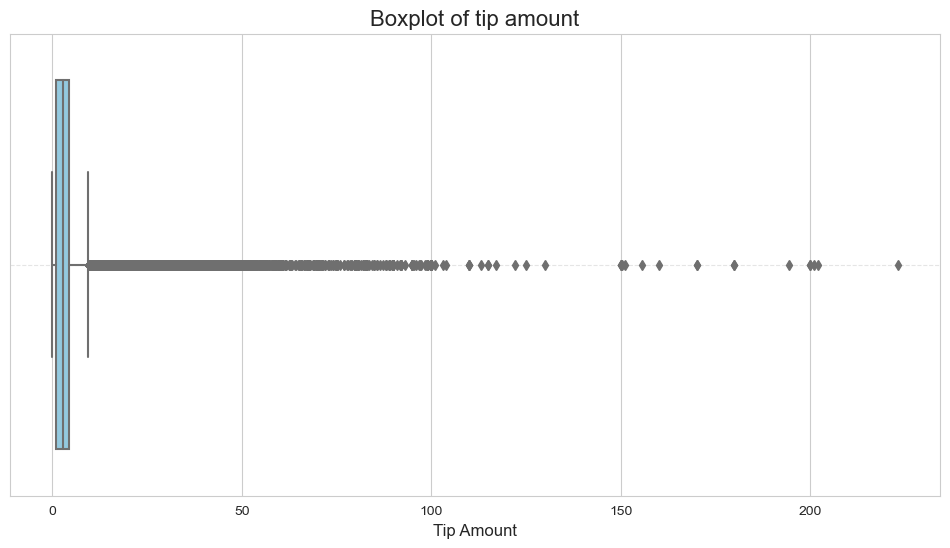

In [727]:
# plotting box plot to check the outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['tip_amount'], color='skyblue')

# Labels and title
plt.title('Boxplot of tip amount', fontsize=16)
plt.xlabel('Tip Amount', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

In [728]:
# Removing the outliers by considering only the data between upper and lower bound

# Calculate IQR
Q1 = df['tip_amount'].quantile(0.25)
Q3 = df['tip_amount'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['tip_amount'] < lower_bound) | (df['tip_amount'] > upper_bound)]

print(f"\n🔍 Number of Outliers in 'tip_amount': {len(outliers)}")
print(upper_bound)
print(lower_bound)
df = df[(df['tip_amount'] >= lower_bound) & (df['tip_amount'] <= upper_bound)]


🔍 Number of Outliers in 'tip_amount': 153236
9.55
-4.13


In [729]:
# Do any columns need standardising?

df.describe()

VendorID  passenger_count  trip_distance    RatecodeID  \
count  1.842655e+06     1.842655e+06   1.842655e+06  1.842655e+06   
mean   1.728494e+00     1.351054e+00   2.623722e+00  1.034463e+00   
std    4.503386e-01     8.787798e-01   3.255801e+00  2.909344e-01   
min    1.000000e+00     0.000000e+00   0.000000e+00  1.000000e+00   
25%    1.000000e+00     1.000000e+00   1.000000e+00  1.000000e+00   
50%    2.000000e+00     1.000000e+00   1.660000e+00  1.000000e+00   
75%    2.000000e+00     1.000000e+00   2.840000e+00  1.000000e+00   
max    6.000000e+00     6.000000e+00   2.048600e+02  6.000000e+00   

       PULocationID  DOLocationID  payment_type   fare_amount         extra  \
count  1.842655e+06  1.842655e+06  1.842655e+06  1.842655e+06  1.842655e+06   
mean   1.669361e+02  1.652070e+02  1.214524e+00  1.670682e+01  1.457506e+00   
std    6.495167e+01  6.952356e+01  4.751091e-01  1.063174e+02  1.620592e+00   
min    1.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00   
25%    1.320000e+02  1.140000e+02  1.000000e+00  9.300000e+00  0.000000e+00   
50%    1.620000e+02  1.620000e+02  1.000000e+00  1.280000e+01  1.000000e+00   
75%    2.340000e+02  2.340000e+02  1.000000e+00  1.910000e+01  2.500000e+00   
max    2.650000e+02  2.650000e+02  4.000000e+00  1.431635e+05  2.080000e+01   

            mta_tax    tip_amount  tolls_amount  improvement_surcharge  \
count  1.842655e+06  1.842655e+06  1.842655e+06           1.842655e+06   
mean   4.972734e-01  2.637633e+00  2.491905e-01           9.990655e-01   
std    3.723412e-02  2.130094e+00  1.451246e+00           2.805209e-02   
min    0.000000e+00  0.000000e+00  0.000000e+00           0.000000e+00   
25%    5.000000e-01  2.000000e-02  0.000000e+00           1.000000e+00   
50%    5.000000e-01  2.620000e+00  0.000000e+00           1.000000e+00   
75%    5.000000e-01  3.980000e+00  0.000000e+00           1.000000e+00   
max    4.000000e+00  9.550000e+00  1.430000e+02           1.000000e+00   

       total_amount  congestion_surcharge   Airport_Fee  pickup_hour  \
count  1.842655e+06          1.842655e+06  1.842655e+06  6047.000000   
mean   2.434810e+01          2.347027e+00  6.950243e-02    13.234993   
std    1.065176e+02          5.991928e-01  3.316217e-01     6.289218   
min    0.000000e+00          0.000000e+00  0.000000e+00     0.000000   
25%    1.560000e+01          2.500000e+00  0.000000e+00     9.000000   
50%    2.016000e+01          2.500000e+00  0.000000e+00    14.000000   
75%    2.770000e+01          2.500000e+00  0.000000e+00    18.000000   
max    1.431675e+05          2.500000e+00  1.750000e+00    23.000000   

       pickup_month  
count   6047.000000  
mean       6.554986  
std        3.415960  
min        1.000000  
25%        4.000000  
50%        7.000000  
75%       10.000000  
max       12.000000

In [730]:
# checking if there are any rows which are not of 2023 year

df['pickup_year'] = df['tpep_pickup_datetime'].dt.year
df = df[df['pickup_year'] == 2023]

In [731]:
df.drop('pickup_year', axis=1, inplace=True)

In [732]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1842654 entries, 0 to 1996060
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  Airport_Fee            float64       
 18  pickup_hour           

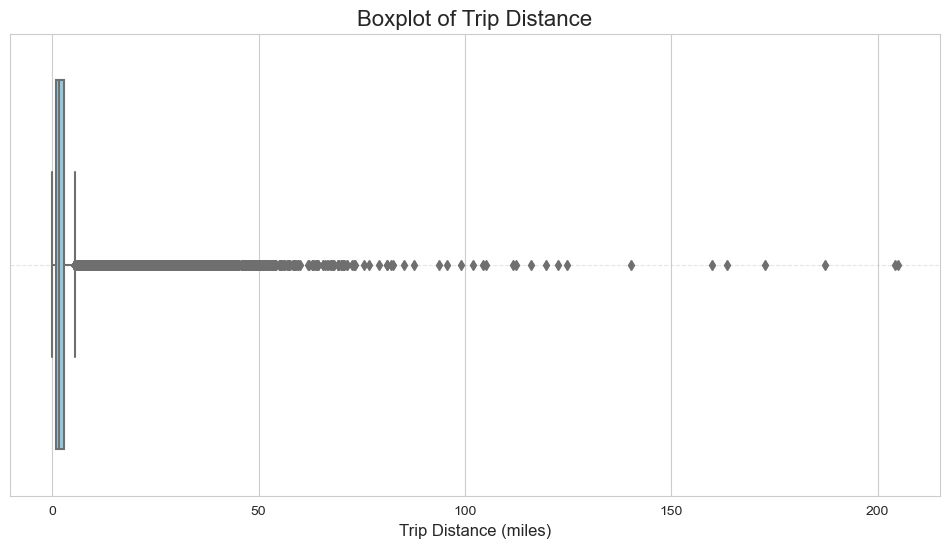

In [733]:
## Plotting box plot for trip distance to check the outliers

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['trip_distance'], color='skyblue')

# Labels and title
plt.title('Boxplot of Trip Distance', fontsize=16)
plt.xlabel('Trip Distance (miles)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

In [734]:
# Removing the outliers by considering only the data between upper and lower bound

# Calculate IQR
Q1 = df['trip_distance'].quantile(0.25)
Q3 = df['trip_distance'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['trip_distance'] < lower_bound) | (df['trip_distance'] > upper_bound)]

print(f"\n🔍 Number of Outliers in 'trip_distance': {len(outliers)}")
print(upper_bound)
print(lower_bound)
df = df[(df['trip_distance'] >= lower_bound) & (df['trip_distance'] <= upper_bound)]


🔍 Number of Outliers in 'trip_distance': 169380
5.6
-1.7599999999999998


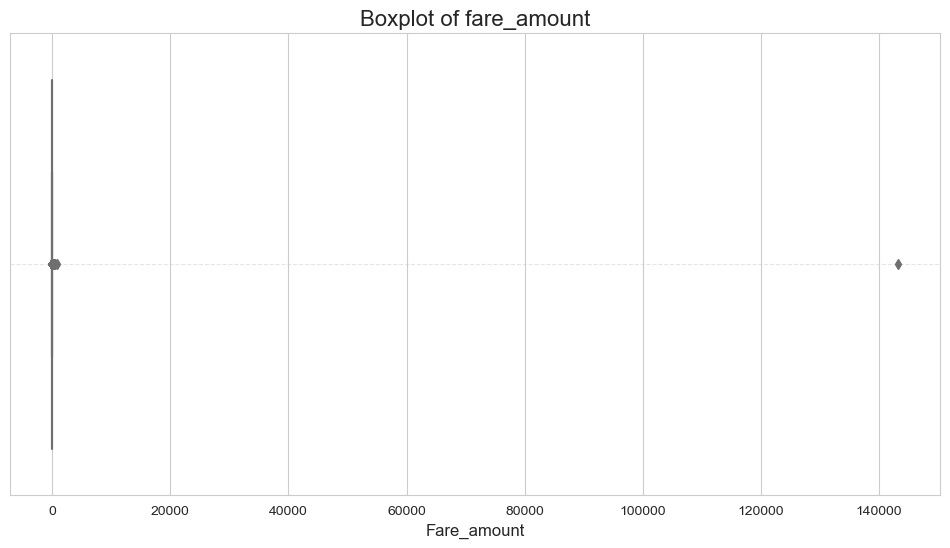

In [735]:
## Plotting box plot for fare amount to check the outliers

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['fare_amount'], color='skyblue')

# Labels and title
plt.title('Boxplot of fare_amount', fontsize=16)
plt.xlabel('Fare_amount', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

In [736]:
# Removing the outliers by considering only the data between upper and lower bound


# Calculate IQR
Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['fare_amount'] < lower_bound) | (df['fare_amount'] > upper_bound)]

print(f"\n🔍 Number of Outliers in 'fare_amount': {len(outliers)}")
print(upper_bound)
print(lower_bound)
df = df[(df['fare_amount'] >= lower_bound) & (df['fare_amount'] <= upper_bound)]


🔍 Number of Outliers in 'fare_amount': 35181
29.6
-4.000000000000002


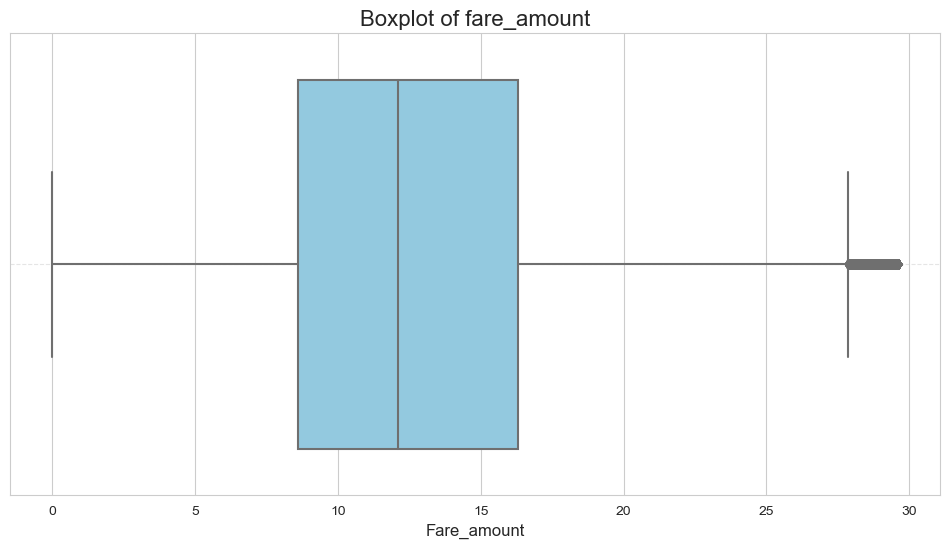

In [737]:
## verifying the data

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['fare_amount'], color='skyblue')

# Labels and title
plt.title('Boxplot of fare_amount', fontsize=16)
plt.xlabel('Fare_amount', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [738]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_Fee',
 'pickup_hour',
 'pickup_month',
 'pickup_day']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

# Categorical variables are as below

1. VendorID
2. RatecodeID
3. PULocationID
4. DOLocationID
5. payment_type

# Numerical variables are as below

1. passenger_count
2. trip_distance
3. pickup_hour
4. trip_duration
5. fare_amount
6. extra
7. mta_tax
8. tip_amount
9. tolls_amount
10. improvement_surcharge
11. total_amount
12. congestion_surcharge
13. airport_fee


# datetime variable
1. tpep_pickup_datetime
2. tpep_dropoff_datetime

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

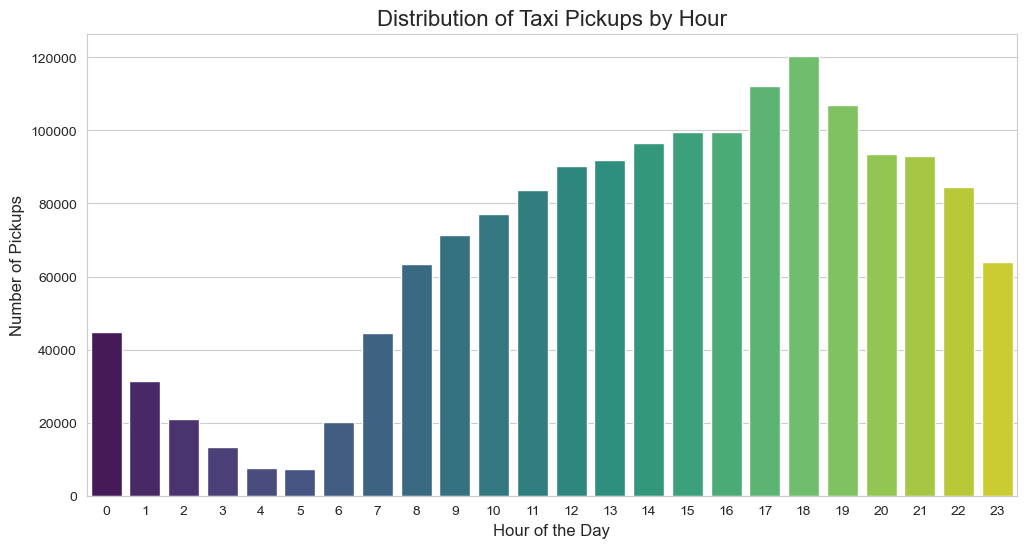

In [739]:
# Find and show the hourly trends in taxi pickups

#creating a new column called pickup_hour
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour


# Set plot style
sns.set_style('whitegrid')

# Plot pickups by hour
plt.figure(figsize=(12, 6))
sns.countplot(x='pickup_hour', data=df, palette='viridis')
plt.title('Distribution of Taxi Pickups by Hour', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Pickups', fontsize=12)
plt.show()

Text(0, 0.5, 'Number of pickups')

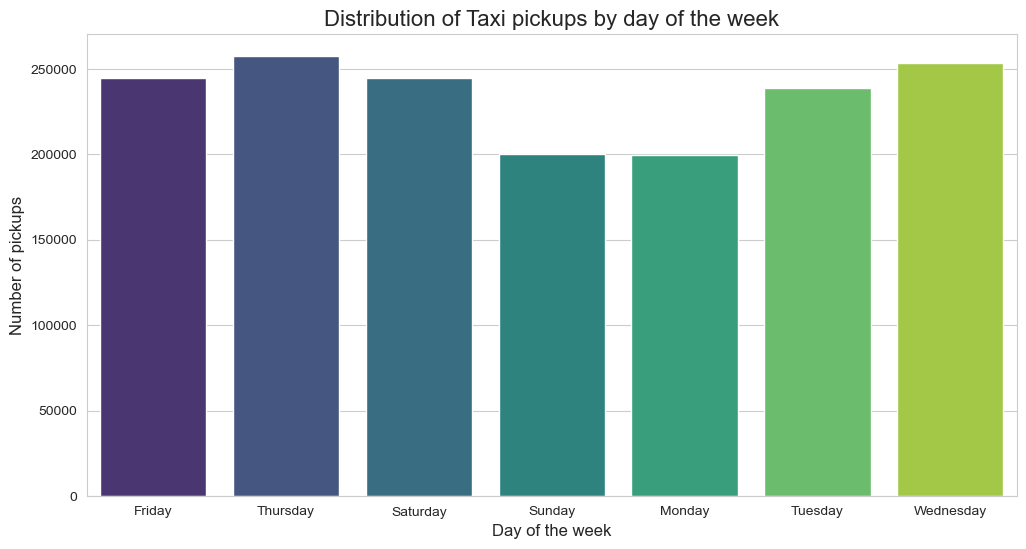

In [740]:
# Find and show the daily trends in taxi pickups (days of the week)
df['pickup_day'] = df['tpep_pickup_datetime'].dt.day_name()

plt.figure(figsize=(12,6))
sns.countplot(x='pickup_day', data=df, palette='viridis')
plt.title("Distribution of Taxi pickups by day of the week", fontsize=16)
plt.xlabel("Day of the week", fontsize=12)
plt.ylabel("Number of pickups", fontsize=12)

Text(0, 0.5, 'Number of pickups')

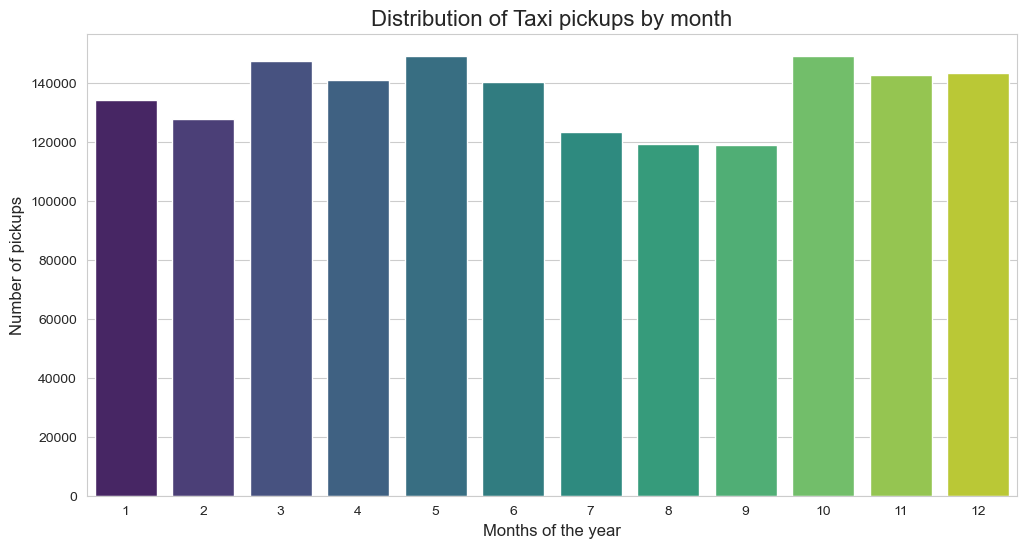

In [741]:
# Show the monthly trends in pickups

df['pickup_month'] = df['tpep_pickup_datetime'].dt.month

plt.figure(figsize=(12,6))
sns.countplot(x='pickup_month', data=df, palette='viridis')
plt.title("Distribution of Taxi pickups by month", fontsize=16)
plt.xlabel("Months of the year", fontsize=12)
plt.ylabel("Number of pickups", fontsize=12)

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [742]:
# Analyse the above parameters

(df.fare_amount < 0).sum()

0

In [743]:
(df.tip_amount < 0).sum()

0

In [744]:
(df.total_amount < 0).sum()

0

In [745]:
(df.trip_distance < 0).sum()

0

In [746]:
zero_neg_count = (df.fare_amount <= 0).sum()
print(zero_neg_count)

513


In [747]:
zero_neg_count = (df.tip_amount <= 0).sum()
print(zero_neg_count)

365017


In [748]:
zero_neg_count = (df.total_amount <= 0).sum()
print(zero_neg_count)

253


In [749]:
zero_neg_count = (df.trip_distance <= 0).sum()
print(zero_neg_count)

28924


In [750]:
df.total_amount.value_counts()

16.80    28396
12.60    25875
21.00    23703
18.00    15141
15.12    15081
         ...  
44.52        1
39.51        1
44.77        1
47.54        1
9.72         1
Name: total_amount, Length: 3855, dtype: int64

In [751]:


financial_cols = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

# Check for zero or negative values in financial parameters
for col in financial_cols:
    zero_count = (df[col] == 0).sum()
    negative_count = (df[col] < 0).sum()
    print(f"📉 {col}: {zero_count} zeros, {negative_count} negative values")

📉 fare_amount: 513 zeros, 0 negative values
📉 tip_amount: 365017 zeros, 0 negative values
📉 total_amount: 253 zeros, 0 negative values
📉 trip_distance: 28924 zeros, 0 negative values


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

we can drop the zero value rows for fare_amount, total_amount and trip_distance but tip_amount can be zero as cash tips are not included so not advisable to drop it

In [752]:


df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1638093 entries, 0 to 1996060
Data columns (total 21 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               1638093 non-null  int64         
 1   tpep_pickup_datetime   1638093 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  1638093 non-null  datetime64[ns]
 3   passenger_count        1638093 non-null  float64       
 4   trip_distance          1638093 non-null  float64       
 5   RatecodeID             1638093 non-null  float64       
 6   PULocationID           1638093 non-null  int64         
 7   DOLocationID           1638093 non-null  int64         
 8   payment_type           1638093 non-null  int64         
 9   fare_amount            1638093 non-null  float64       
 10  extra                  1638093 non-null  float64       
 11  mta_tax                1638093 non-null  float64       
 12  tip_amount             16380

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [753]:
# Create a df with non zero entries for the selected parameters.

cols_to_drop = ['fare_amount', 'total_amount', 'trip_distance']

# Remove rows where any of the specified columns have zero values
df1 = df[(df[cols_to_drop] != 0).all(axis=1)]

In [754]:
for col in cols_to_drop:
    zero_count = (df1[col] == 0).sum()
    print(f"🔍 {col}: {zero_count} zeros remaining")

🔍 fare_amount: 0 zeros remaining
🔍 total_amount: 0 zeros remaining
🔍 trip_distance: 0 zeros remaining


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [755]:
# Group data by month and analyse monthly revenue

df2 = df1.groupby('pickup_month')['total_amount'].sum().reset_index()

df2

pickup_month  total_amount
0              1    2615776.52
1              2    2520188.02
2              3    2932891.99
3              4    2822969.52
4              5    3039530.93
5              6    2843768.68
6              7    2450719.07
7              8    2364456.08
8              9    2396151.35
9             10    3013111.83
10            11    2873769.47
11            12    2910984.64

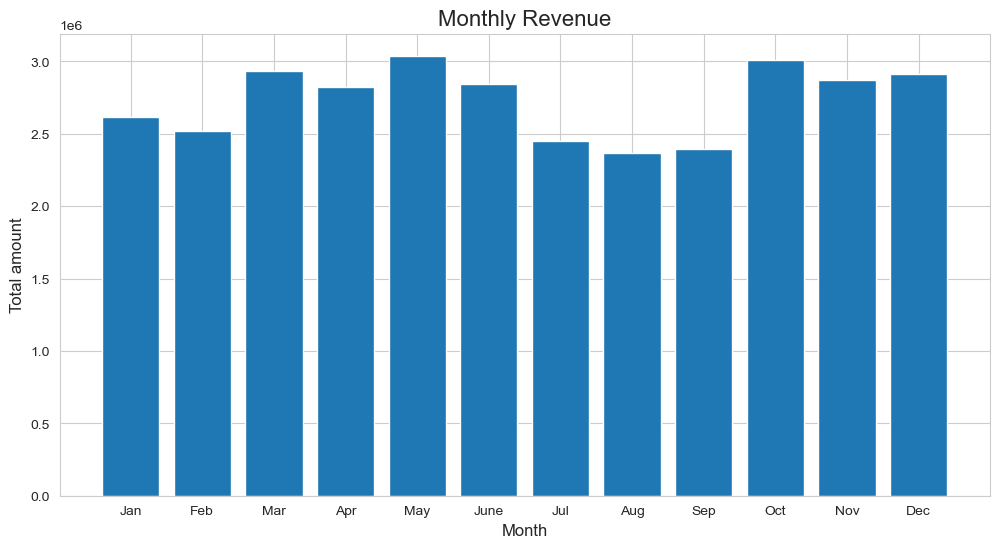

In [756]:
#plotting bar chart for monthly revenue

plt.figure(figsize=(12,6))
plt.bar(df2['pickup_month'], df2['total_amount'])
plt.title("Monthly Revenue",fontsize=16)
plt.xlabel("Month",fontsize=12)
plt.ylabel("Total amount", fontsize=12)
plt.xticks(df2['pickup_month'],labels=['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [757]:
# Calculate proportion of each quarter
df1['pickup_quarter'] = df1['tpep_pickup_datetime'].dt.quarter


In [758]:
df3 = df1.groupby('pickup_quarter')['total_amount'].sum().reset_index()
df3

pickup_quarter  total_amount
0               1    8068856.53
1               2    8706269.13
2               3    7211326.50
3               4    8797865.94

In [759]:
df3['proportion'] = df3['total_amount']/df3['total_amount'].sum()
df3['proportion']

0    0.246119
1    0.265562
2    0.219963
3    0.268356
Name: proportion, dtype: float64

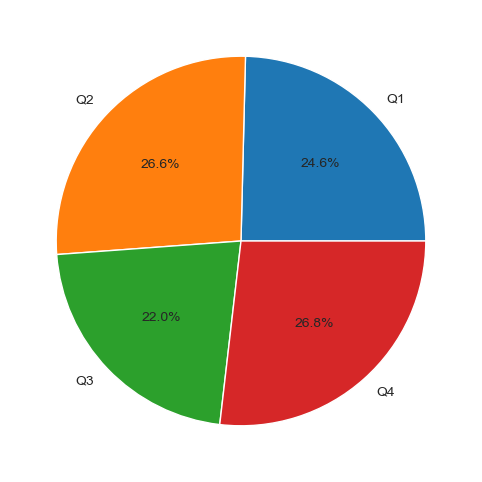

In [760]:
## Plotting above analysis using pie plot

plt.figure(figsize=(12,6))
plt.pie(df3['proportion'], labels=[f"Q{q}" for q in df3['pickup_quarter']],autopct='%1.1f%%', )
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [761]:
# Show how trip fare is affected by distance

# I have already removed all the rows where trip_distance is zero

correlation = df1['trip_distance'].corr(df1['fare_amount'])
print("correlation between trip distance and fare amount is", correlation)

correlation between trip distance and fare amount is 0.865315931923214


### As the correlation value is near to 1, there is positive relationship means longer distance leads to higher fare amount

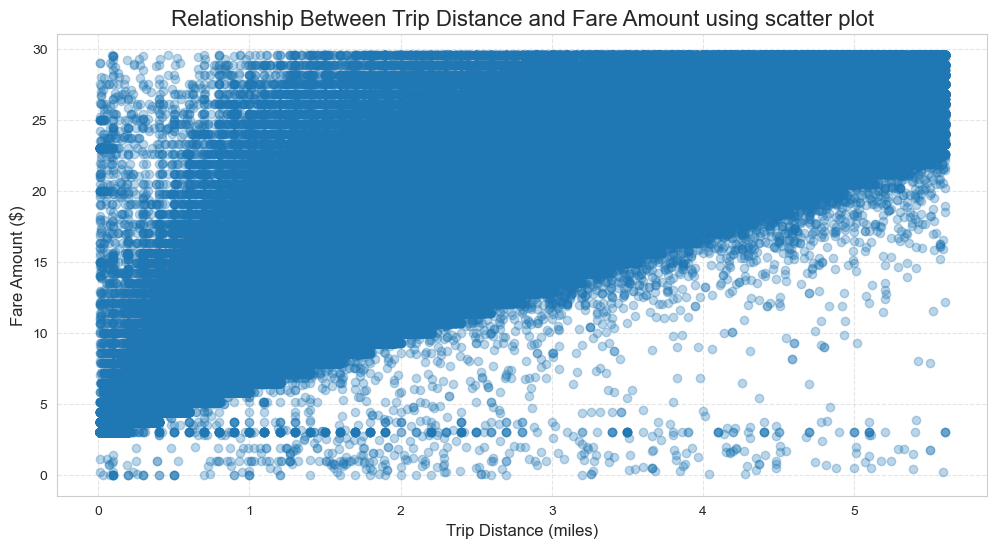

In [762]:
plt.figure(figsize=(12,6))
plt.scatter(df1['trip_distance'],df1['fare_amount'], alpha=0.3 )
plt.title('Relationship Between Trip Distance and Fare Amount using scatter plot', fontsize=16)
plt.xlabel('Trip Distance (miles)', fontsize=12)
plt.ylabel('Fare Amount ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

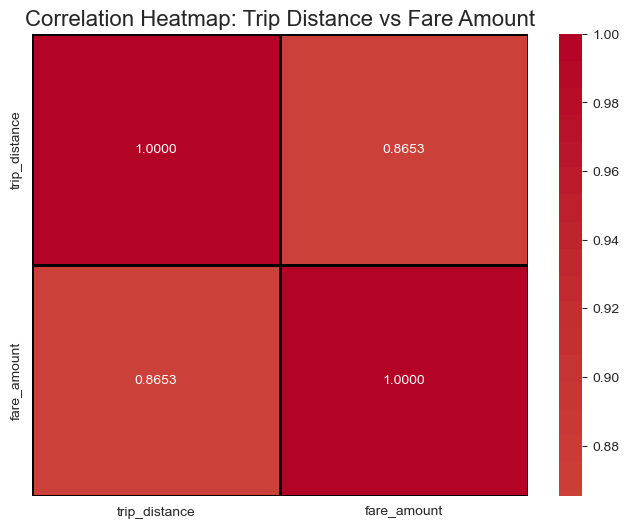

In [763]:
corr_matrix = df1[['trip_distance', 'fare_amount']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".4f", cmap="coolwarm", center=0, linewidths=1, linecolor='black')

# Labels and title
plt.title('Correlation Heatmap: Trip Distance vs Fare Amount', fontsize=16)
plt.show()


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [764]:
# Show relationship between fare and trip duration

# Calculate trip duration in minutes
df1['trip_duration'] = (df1['tpep_dropoff_datetime'] - df1['tpep_pickup_datetime']).dt.total_seconds() / 60

df4 = df1[(df1['trip_duration'] > 0) & (df1['trip_duration'] <= 1440)]  # 1440 min = 24 hours

correlation = df4['fare_amount'].corr(df4['trip_duration'])
print(correlation)

0.175839837136018


### correlation between fare and trip duration is near to zero, hence there is no clear relationship between trip duration and fare amount

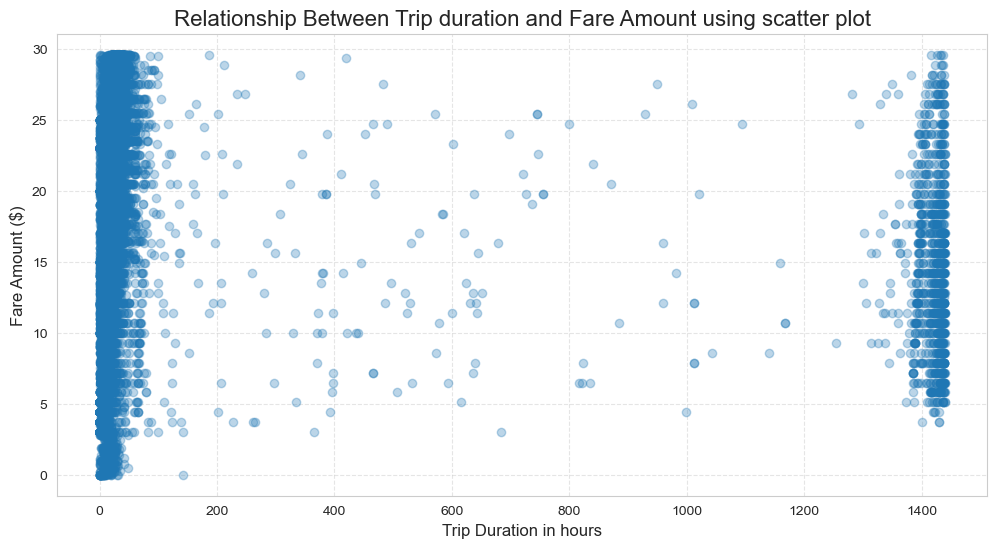

In [765]:
plt.figure(figsize=(12,6))
plt.scatter(df4['trip_duration'],df4['fare_amount'], alpha=0.3 )
plt.title('Relationship Between Trip duration and Fare Amount using scatter plot', fontsize=16)
plt.xlabel('Trip Duration in hours', fontsize=12)
plt.ylabel('Fare Amount ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

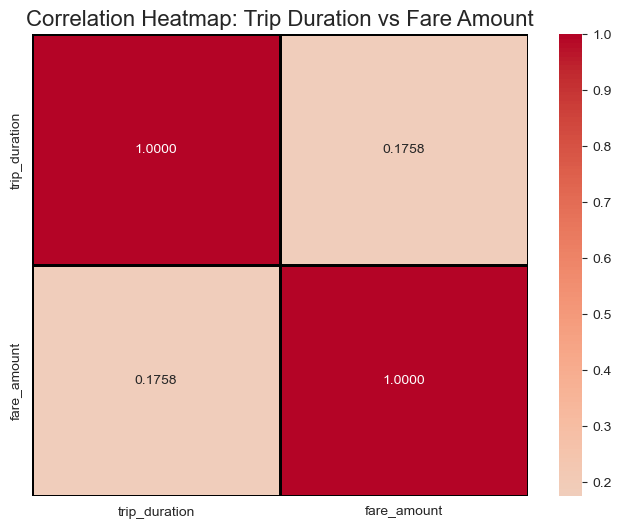

In [766]:
corr_matrix = df4[['trip_duration', 'fare_amount']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".4f", cmap="coolwarm", center=0, linewidths=1, linecolor='black')

# Labels and title
plt.title('Correlation Heatmap: Trip Duration vs Fare Amount', fontsize=16)
plt.show()


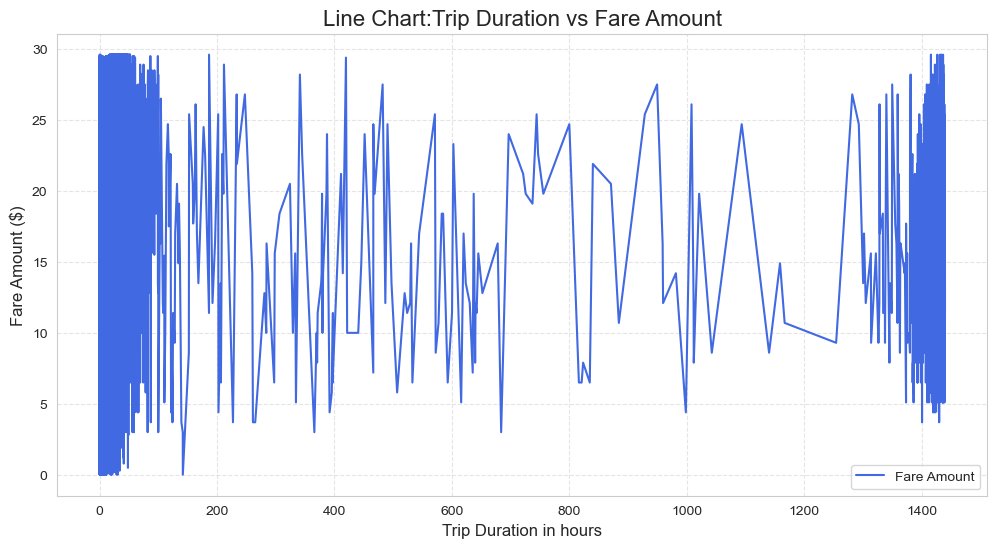

In [767]:
df_sorted = df4.sort_values('trip_duration')

# Plotting the line chart
plt.figure(figsize=(12, 6))
plt.plot(df_sorted['trip_duration'], df_sorted['fare_amount'], color='royalblue', label='Fare Amount')

# Labels and title
plt.title('Line Chart:Trip Duration vs Fare Amount', fontsize=16)
plt.xlabel('Trip Duration in hours', fontsize=12)
plt.ylabel('Fare Amount ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

In [768]:
# Show relationship between fare and number of passengers

# calculation average fare for a passenger
avg_fare_by_passenger = df1.groupby('passenger_count')['fare_amount'].mean().reset_index()

# Display the grouped data
print(avg_fare_by_passenger)


   passenger_count  fare_amount
0              0.0    12.607176
1              1.0    13.021196
2              2.0    13.269105
3              3.0    13.355879
4              4.0    13.687794
5              5.0    13.052730
6              6.0    13.060681


In [769]:
correlation = avg_fare_by_passenger['fare_amount'].corr(avg_fare_by_passenger['passenger_count'])
print(correlation)

0.4239260583763527


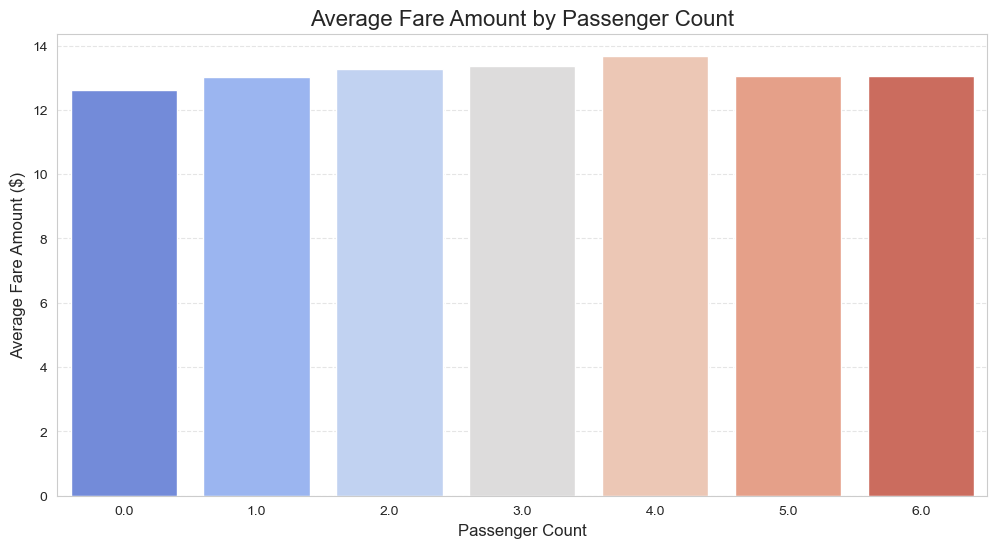

In [770]:
plt.figure(figsize=(12, 6))
sns.barplot(x='passenger_count', y='fare_amount', data=avg_fare_by_passenger, palette='coolwarm')

# Labels and title
plt.title('Average Fare Amount by Passenger Count', fontsize=16)
plt.xlabel('Passenger Count', fontsize=12)
plt.ylabel('Average Fare Amount ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

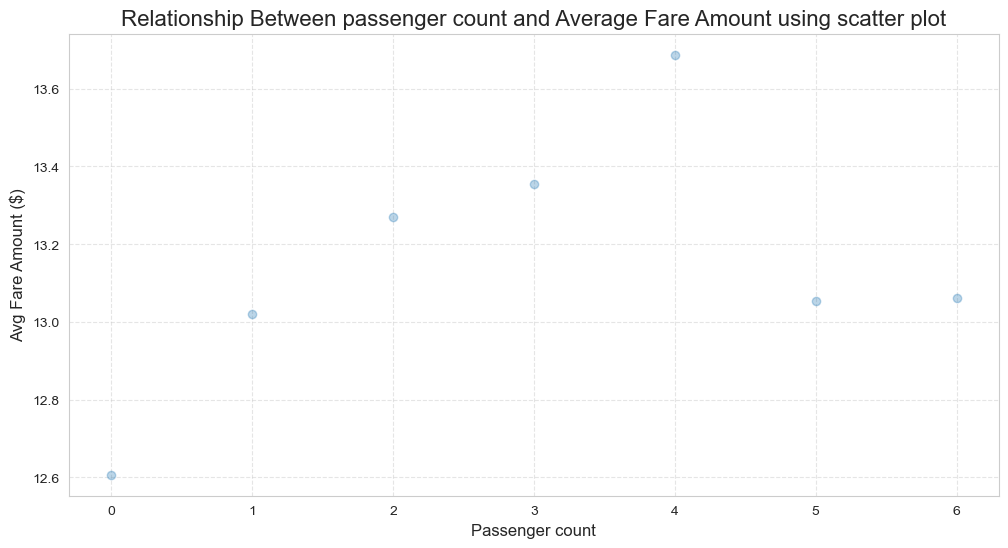

In [771]:
plt.figure(figsize=(12,6))
plt.scatter(avg_fare_by_passenger['passenger_count'],avg_fare_by_passenger['fare_amount'], alpha=0.3 )
plt.title('Relationship Between passenger count and Average Fare Amount using scatter plot', fontsize=16)
plt.xlabel('Passenger count', fontsize=12)
plt.ylabel('Avg Fare Amount ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

### Avg Fare amount is increasing as the number of passengers are increasing till 4 , post that the average fare amount slopes down

In [772]:
# Show relationship between tip and trip distance

# Group by rounded trip_distance and calculate average tip
avg_tip_by_distance = df1.groupby(df1['trip_distance'].round(1))['tip_amount'].mean().reset_index()

# Display the grouped data
print(avg_tip_by_distance.head())


   trip_distance  tip_amount
0            0.0    0.373134
1            0.1    0.657353
2            0.2    1.099952
3            0.3    1.294946
4            0.4    1.435613


In [773]:
correlation = avg_tip_by_distance['tip_amount'].corr(avg_tip_by_distance['trip_distance'])

print(f"📊 Correlation between 'tip_amount' and 'trip_distance': {correlation:.4f}")

📊 Correlation between 'tip_amount' and 'trip_distance': 0.9541


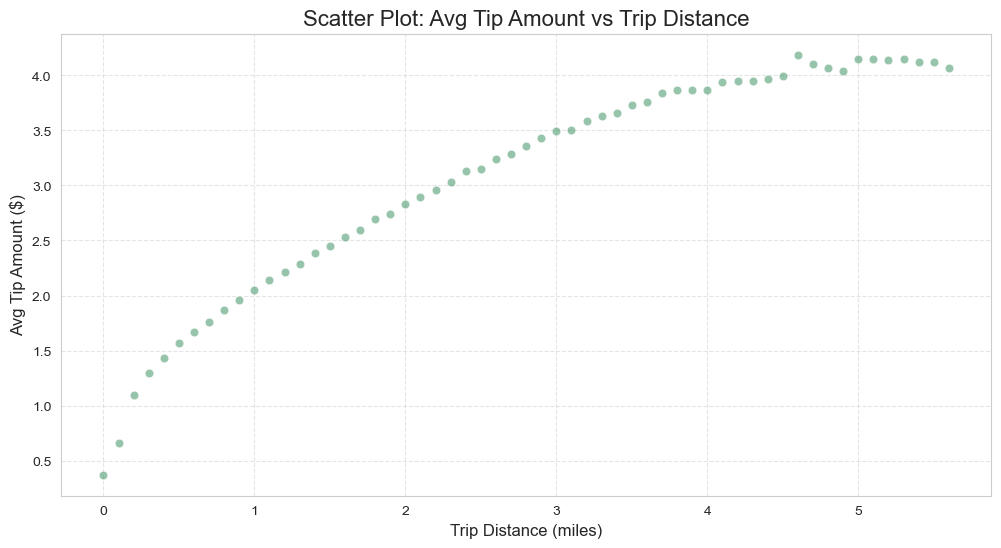

In [774]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='trip_distance', y='tip_amount', data=avg_tip_by_distance, color='seagreen', alpha=0.5)

# Labels and title
plt.title('Scatter Plot: Avg Tip Amount vs Trip Distance', fontsize=16)
plt.xlabel('Trip Distance (miles)', fontsize=12)
plt.ylabel('Avg Tip Amount ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [775]:
# Analyse the distribution of different payment types (payment_type).

payment_labels = {
    1: '1 = Credit card',
    2: '2 = Cash',
    3: '3 = No charge',
    4: '4 = Dispute'
}

# Map the labels in the dataframe
df1['payment_type_label'] = df1['payment_type'].map(payment_labels)

df5 = df1['payment_type_label'].value_counts().reset_index()
df5

index  payment_type_label
0  1 = Credit card             1325367
1         2 = Cash              267221
2      4 = Dispute               10376
3    3 = No charge                5960

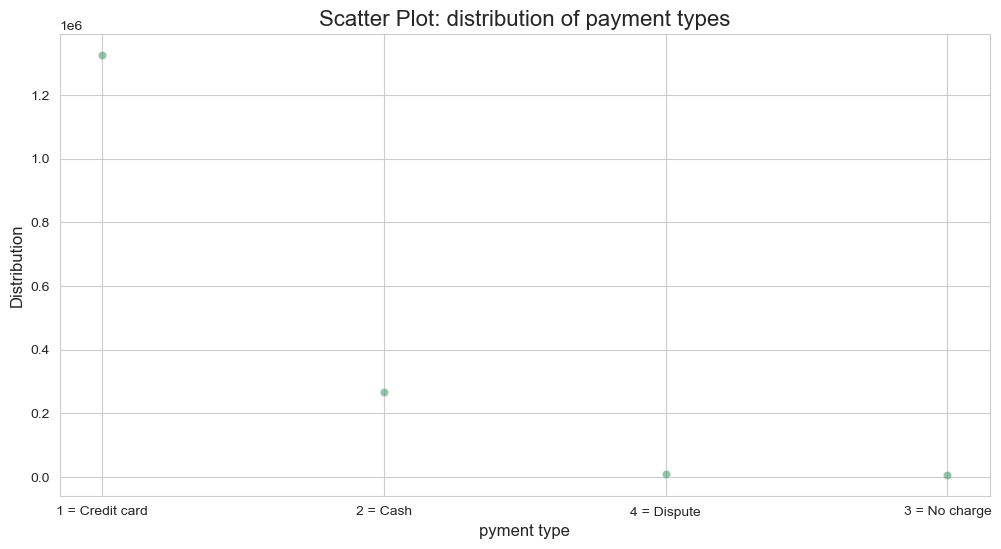

In [776]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='index', y='payment_type_label', data=df5, color='seagreen', alpha=0.5)

# Labels and title
plt.title('Scatter Plot: distribution of payment types', fontsize=16)
plt.xlabel('pyment type', fontsize=12)
plt.ylabel('Distribution', fontsize=12)


plt.show()

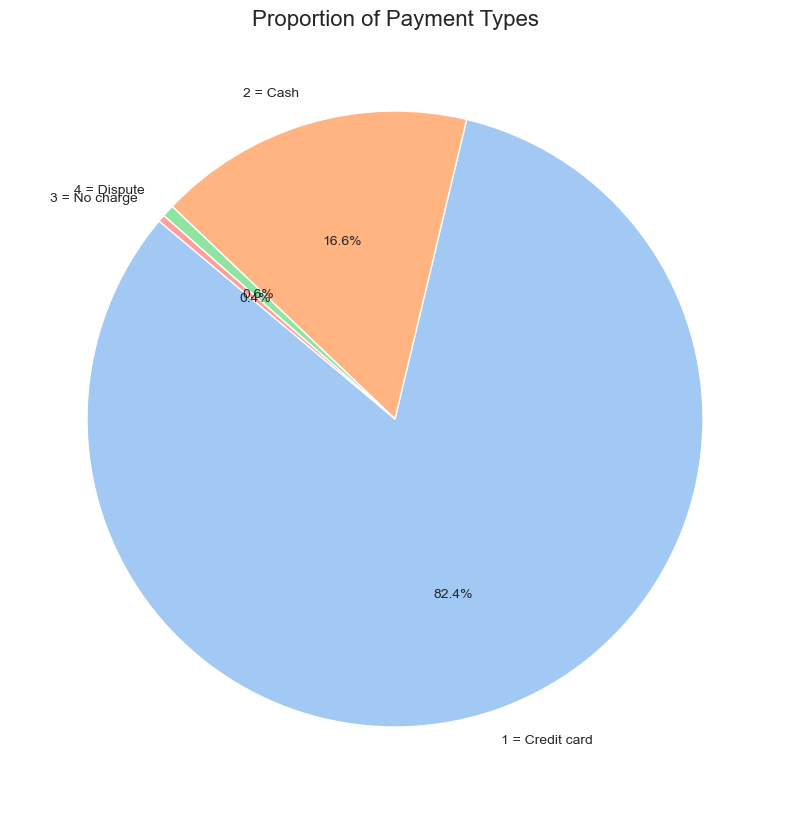

In [777]:
# Pie chart
plt.figure(figsize=(10, 10))
plt.pie(df5['payment_type_label'], labels=df5['index'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))

# Title
plt.title('Proportion of Payment Types', fontsize=16)

plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [778]:
# !pip install geopandas



**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [783]:
# import geopandas as gpd
import geopandas as gpd

os.getcwd()
# Read the shapefile using geopandas
zones = gpd.read_file('../taxi_zones/taxi_zones.shp')
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

In [784]:
# print(zones.info())
# zones.plot()

zones.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB


<Axes: >

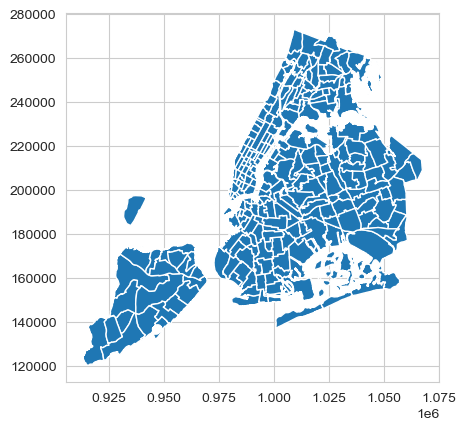

In [785]:
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [786]:
# Merge zones and trip records using locationID and PULocationID

trip_with_zones = df1.merge(
    zones,
    how='left',
    left_on='PULocationID',
    right_on='LocationID',
    suffixes=('', '_pickup')
).rename(columns={'zone': 'pickup_zone', 'borough': 'pickup_borough'})
trip_with_zones

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-12-01 00:27:51   2023-12-01 00:50:12              1.0   
1               2  2023-12-01 00:38:48   2023-12-01 01:01:55              1.0   
2               2  2023-12-01 00:06:19   2023-12-01 00:16:57              1.0   
3               2  2023-12-01 00:00:50   2023-12-01 00:14:37              1.0   
4               2  2023-12-01 00:16:07   2023-12-01 00:19:17              1.0   
...           ...                  ...                   ...              ...   
1608971         2  2023-06-30 23:11:55   2023-06-30 23:29:09              1.0   
1608972         2  2023-06-30 23:19:44   2023-06-30 23:32:53              1.0   
1608973         2  2023-06-30 23:53:10   2023-07-01 00:05:55              1.0   
1608974         1  2023-06-30 23:05:31   2023-06-30 23:15:52              1.0   
1608975         2  2023-07-01 00:00:51   2023-07-01 00:24:19              1.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0                 3.99         1.0           148            50             1   
1                 4.79         1.0           231            61             1   
2                 1.05         1.0           161           161             1   
3                 2.08         1.0           137           144             1   
4                 0.40         1.0            68            68             1   
...                ...         ...           ...           ...           ...   
1608971           1.78         1.0            41           226             2   
1608972           2.03         1.0            79           170             1   
1608973           2.63         1.0           170           143             1   
1608974           1.00         1.0            87           231             2   
1608975           5.04         1.0           209           225             1   

         fare_amount  ...  pickup_quarter  trip_duration  payment_type_label  \
0              23.30  ...               4      22.350000     1 = Credit card   
1              22.43  ...               4      23.116667     1 = Credit card   
2              10.70  ...               4      10.633333     1 = Credit card   
3              17.22  ...               4      13.783333     1 = Credit card   
4               5.10  ...               4       3.166667     1 = Credit card   
...              ...  ...             ...            ...                 ...   
1608971        16.30  ...               2      17.233333            2 = Cash   
1608972        14.20  ...               2      13.150000     1 = Credit card   
1608973        14.20  ...               2      12.750000     1 = Credit card   
1608974        10.70  ...               2      10.350000            2 = Cash   
1608975        25.40  ...               3      23.466667     1 = Credit card   

         OBJECTID  Shape_Leng  Shape_Area               pickup_zone  \
0           148.0    0.039131    0.000070           Lower East Side   
1           231.0    0.063420    0.000167      TriBeCa/Civic Center   
2           161.0    0.035804    0.000072            Midtown Center   
3           137.0    0.046108    0.000116                  Kips Bay   
4            68.0    0.049337    0.000111              East Chelsea   
...           ...         ...         ...                       ...   
1608971      41.0    0.052793    0.000143            Central Harlem   
1608972      79.0    0.042625    0.000108              East Village   
1608973     170.0    0.045769    0.000074               Murray Hill   
1608974      87.0    0.036902    0.000067  Financial District North   
1608975     209.0    0.030695    0.000039                   Seaport   

         LocationID  pickup_borough  \
0             148.0       Manhattan   
1             231.0       Manhattan   
2             161.0       Manhattan   
3             137.0       Manhattan   
4              68.0       Manhattan   
...             ...        

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [787]:
# Group data by location and calculate the number of trips

trips_by_location = trip_with_zones.groupby('PULocationID').size().reset_index(name='trip_count')

# 🚀 Merge with zone information to include zone names
trips_by_location = pd.merge(
    trips_by_location, 
    zones[['LocationID', 'zone', 'borough']], 
    how='left', 
    left_on='PULocationID', 
    right_on='LocationID'
)

# 🚀 Drop redundant LocationID column from zones
trips_by_location.drop('LocationID', axis=1, inplace=True)

# ✅ Display results
print(trips_by_location.head())

   PULocationID  trip_count                     zone        borough
0             1          12           Newark Airport            EWR
1             3          16  Allerton/Pelham Gardens          Bronx
2             4        2036            Alphabet City      Manhattan
3             6          20  Arrochar/Fort Wadsworth  Staten Island
4             7         708                  Astoria         Queens


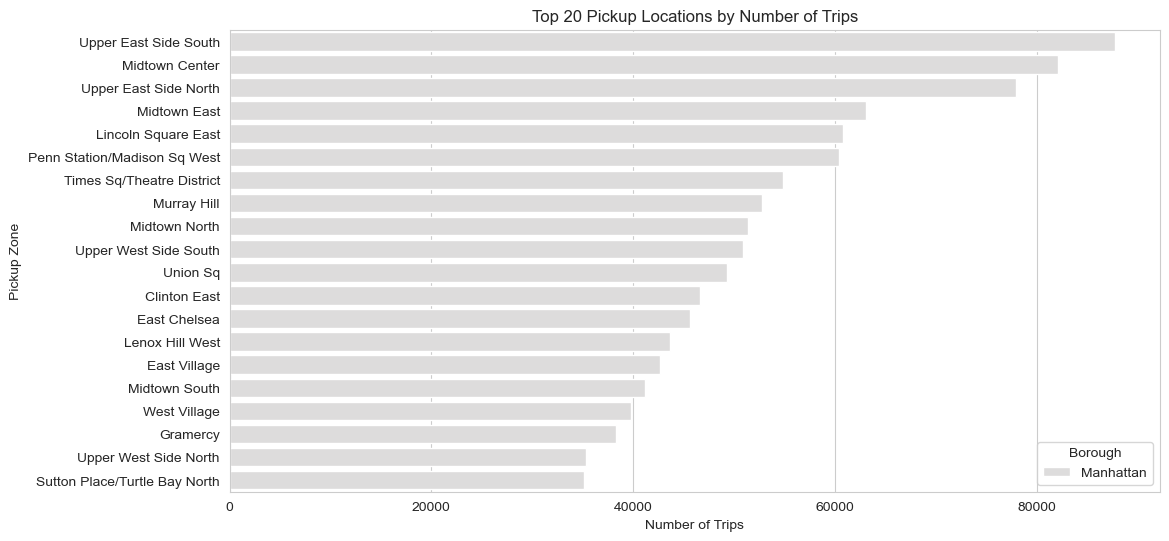

In [788]:
trips_by_location = trips_by_location.sort_values('trip_count', ascending=False).head(20)

# 🚀 Plotting the top 20 locations by trip count
plt.figure(figsize=(12, 6))
sns.barplot(data=trips_by_location, x='trip_count', y='zone', hue='borough', palette='coolwarm')

plt.title('Top 20 Pickup Locations by Number of Trips')
plt.xlabel('Number of Trips')
plt.ylabel('Pickup Zone')
plt.legend(title='Borough')
plt.show()

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [789]:
# Merge trip counts back to the zones GeoDataFrame

zones_with_trips = zones.merge(
    trips_by_location, 
    how='left', 
    left_on='LocationID', 
    right_on='PULocationID'
)

# 🚀 Fill NaN values with 0 (zones with no trips)
zones_with_trips['trip_count'].fillna(0, inplace=True)

# ✅ Display the merged GeoDataFrame

zones_with_trips

OBJECTID  Shape_Leng  Shape_Area                   zone_x  LocationID  \
0           1    0.116357    0.000782           Newark Airport           1   
1           2    0.433470    0.004866              Jamaica Bay           2   
2           3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3           4    0.043567    0.000112            Alphabet City           4   
4           5    0.092146    0.000498            Arden Heights           5   
..        ...         ...         ...                      ...         ...   
258       259    0.126750    0.000395       Woodlawn/Wakefield         259   
259       260    0.133514    0.000422                 Woodside         260   
260       261    0.027120    0.000034       World Trade Center         261   
261       262    0.049064    0.000122           Yorkville East         262   
262       263    0.037017    0.000066           Yorkville West         263   

         borough_x                                           geometry  \
0              EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1           Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2            Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3        Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4    Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   
..             ...                                                ...   
258          Bronx  POLYGON ((1025414.782 270986.139, 1025138.624 ...   
259         Queens  POLYGON ((1011466.966 216463.005, 1011545.889 ...   
260      Manhattan  POLYGON ((980555.204 196138.486, 980570.792 19...   
261      Manhattan  MULTIPOLYGON (((999804.795 224498.527, 999824....   
262      Manhattan  POLYGON ((997493.323 220912.386, 997355.264 22...   

     PULocationID  trip_count zone_y borough_y  
0             NaN         0.0    NaN       NaN  
1             NaN         0.0    NaN       NaN  
2             NaN         0.0    NaN       NaN  
3             NaN         0.0    NaN       NaN  
4             NaN         0.0    NaN       NaN  
..            ...         ...    ...       ...  
258           NaN         0.0    NaN       NaN  
259           NaN         0.0    NaN       NaN  
260           NaN         0.0    NaN       NaN  
261           NaN         0.0    NaN       NaN  
262           NaN         0.0    NaN       NaN  

[263 rows x 11 columns]

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

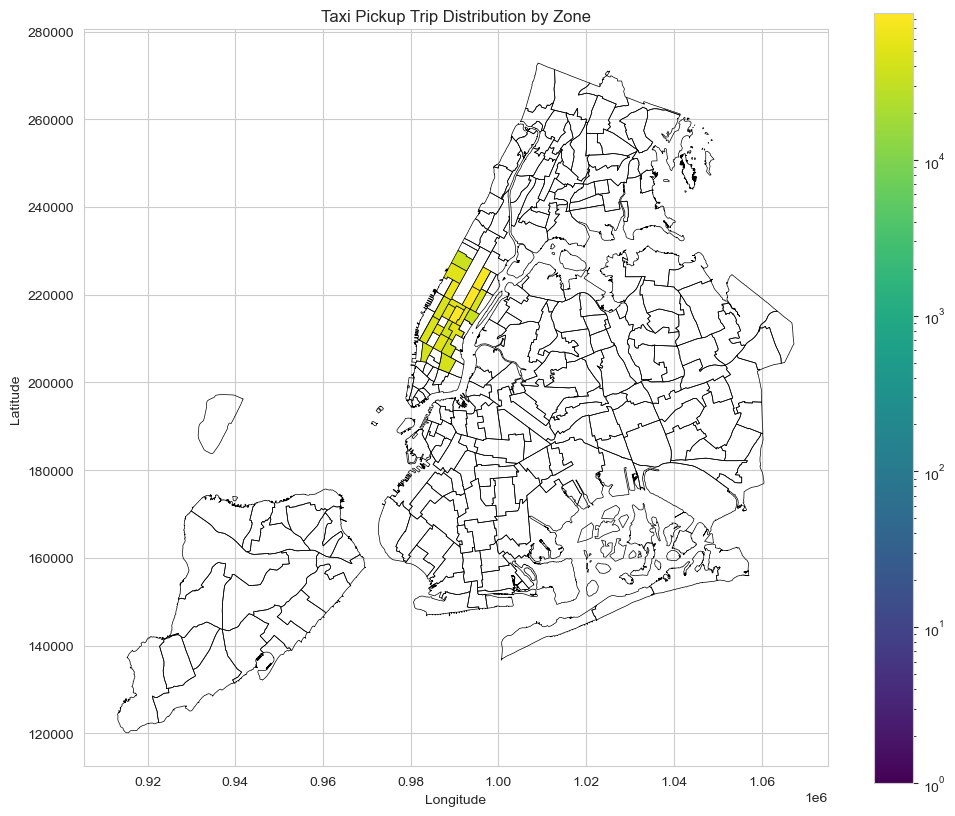

In [790]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map and display it


# Define color map and normalization
cmap = plt.get_cmap('viridis')
norm = mcolors.LogNorm(vmin=1, vmax=zones_with_trips['trip_count'].max())

# Plot the zones with trip counts
zones_with_trips.plot(
    column='trip_count', 
    cmap=cmap, 
    linewidth=0.5, 
    ax=ax, 
    edgecolor='black', 
    legend=True,
    norm=norm
)

# Plot styling
plt.title('Taxi Pickup Trip Distribution by Zone')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


In [791]:
# can you try displaying the zones DF sorted by the number of trips?

# 🔥 Sort the GeoDataFrame by the number of trips in descending order
zones_sorted = zones_with_trips.sort_values(by='trip_count', ascending=False)

# 🔥 Display the top 10 zones with the highest trip counts
print("\n📊 Top 10 Zones with the Highest Trip Counts:\n")
print(zones_sorted.head(10))

# 🔥 Display the bottom 10 zones with the lowest trip counts
print("\n📉 Bottom 10 Zones with the Lowest Trip Counts:\n")
print(zones_sorted.tail(10))


📊 Top 10 Zones with the Highest Trip Counts:

     OBJECTID  Shape_Leng  Shape_Area                        zone_x  \
236       237    0.042213    0.000096         Upper East Side South   
160       161    0.035804    0.000072                Midtown Center   
235       236    0.044252    0.000103         Upper East Side North   
161       162    0.035270    0.000048                  Midtown East   
141       142    0.038176    0.000076           Lincoln Square East   
185       186    0.024696    0.000037  Penn Station/Madison Sq West   
229       230    0.031028    0.000056     Times Sq/Theatre District   
169       170    0.045769    0.000074                   Murray Hill   
162       163    0.034177    0.000041                 Midtown North   
238       239    0.063626    0.000205         Upper West Side South   

     LocationID  borough_x                                           geometry  \
236         237  Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...   
160      

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [792]:
# Find routes which have the slowest speeds at different times of the day

route_speed = ( 
                df1.groupby(['PULocationID', 'DOLocationID', 'pickup_hour'])
                .agg(
                    avg_trip_duration=('trip_duration', 'mean'),       # Average trip duration (in seconds)
                    avg_distance=('trip_distance', 'mean'),            # Average distance
                    total_trips=('trip_duration', 'count')
                )
            .reset_index()
)


#  Converting average trip duration to hours
route_speed['avg_trip_duration_hr'] = route_speed['avg_trip_duration'] / 3600  # Convert seconds to hours

# Calculating Average Speed
route_speed['avg_speed'] = route_speed['avg_distance'] / route_speed['avg_trip_duration_hr']

#  Sorting by Average Speed to Identify Slow Routes
slow_routes = route_speed.sort_values(by='avg_speed', ascending=True).reset_index(drop=True)

# Displaying the slowest 10 routes
print("\n Slowest 10 Routes by Average Speed:\n")
print(slow_routes[['PULocationID', 'DOLocationID', 'pickup_hour', 'avg_speed', 'avg_trip_duration_hr', 'avg_distance', 'total_trips']].head(10))


 Slowest 10 Routes by Average Speed:

   PULocationID  DOLocationID  pickup_hour      avg_speed  \
0           265           137            6 -533520.000000   
1           265           244            7 -368640.000000   
2           265           116           19 -114912.000000   
3           265             7           18  -52200.000000   
4           265           209           12  -51673.846154   
5           265           258           12  -49680.000000   
6           265            68            7  -43003.636364   
7           265           261           19  -39908.571429   
8           265           152           11  -37080.000000   
9           265            75           12  -31752.000000   

   avg_trip_duration_hr  avg_distance  total_trips  
0             -0.000009          4.94            1  
1             -0.000014          5.12            1  
2             -0.000023          2.66            1  
3             -0.000083          4.35            1  
4             -0.000060 

How does identifying high-traffic, high-demand routes help us?

### High traffic and high demand routes helps us many ways as updated below

1. tracking and re-routing the drivers to a better route
2. Providing dynamic pricing during high demand
3. Can allocate more taxis in the area during high demand
4. Can work with Government to improve the infrastructure 

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [793]:
# Visualise the number of trips per hour and find the busiest hour

trips_per_hour = df1.groupby('pickup_hour').size().reset_index(name='num_trips')


#scaling the number up by the sampling ratio.

# Sampling ratio
sampling_ratio = 0.05  

# Scale the number of trips by the inverse of the sampling fraction
trips_per_hour['scaled_trips'] = (trips_per_hour['num_trips'] / sampling_ratio).astype(int)



# Identify the busiest hour with scaled trips
busiest_hour_scaled = trips_per_hour.loc[trips_per_hour['scaled_trips'].idxmax()]
busiest_hour_num_scaled = busiest_hour_scaled['pickup_hour']
busiest_hour_trips_scaled = busiest_hour_scaled['scaled_trips']

print(f"Busiest hour (scaled): {busiest_hour_num_scaled}:00 with approximately {busiest_hour_trips_scaled} trips")

Busiest hour (scaled): 18:00 with approximately 2371040 trips


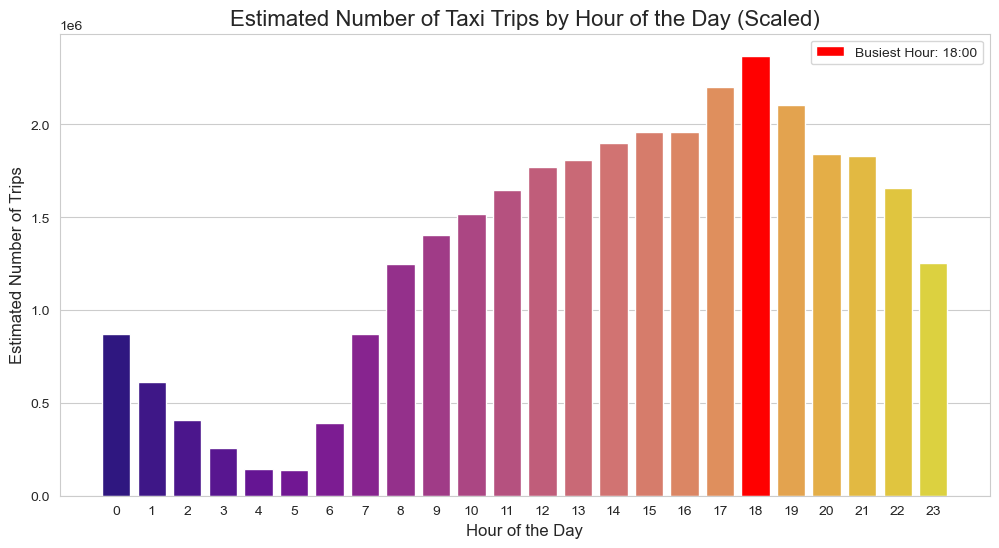

In [794]:
plt.figure(figsize=(12, 6))
sns.barplot(data=trips_per_hour, x='pickup_hour', y='scaled_trips', palette='plasma')

# Highlight the busiest hour in red
plt.bar(busiest_hour_num_scaled, busiest_hour_trips_scaled, color='red', label=f'Busiest Hour: {busiest_hour_num_scaled}:00')

# Labels and title
plt.title('Estimated Number of Taxi Trips by Hour of the Day (Scaled)', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Estimated Number of Trips', fontsize=12)
plt.xticks(range(0, 24))
plt.legend()

plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

### Use of this busiest hour data
1. Using this analysis we came to know the bussiest hour is around 18:00
2. This could be because of office end timings
3. Using this data we can plan to increase the taxis during this time in the busiest routes
4. Also can apply dynamic pricing (higher fares) to increase the profit

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [795]:
# Scale up the number of trips

#. this is done in previous code "trips_per_hour['scaled_trips'] = (trips_per_hour['num_trips'] / sampling_ratio).astype(int)"

# Fill in the value of your sampling fraction and use that to scale up the numbers
top_5_busiest_hours = trips_per_hour.nlargest(5, 'scaled_trips' )


print(top_5_busiest_hours[['pickup_hour', 'scaled_trips']])


    pickup_hour  scaled_trips
18           18       2371040
17           17       2202520
19           19       2105320
15           15       1961580
16           16       1961400


In [796]:
# Compare traffic trends for the week days and weekends

df1['day_of_week'] = df1['tpep_pickup_datetime'].dt.dayofweek

# classify as weekday or weekend

df1['day_type'] = df1['day_of_week'].apply(lambda x: 'weekend' if x>=5 else 'weekday' )

trips_by_day_type = df1.groupby('day_type' ).size().reset_index(name='num_trips')

sample_ratio = 0.05
trips_by_day_type['scaled_trips'] = (trips_by_day_type['num_trips']/ sample_ratio).astype(int)

trips_by_day_type


day_type  num_trips  scaled_trips
0  weekday    1172974      23459480
1  weekend     435950       8719000

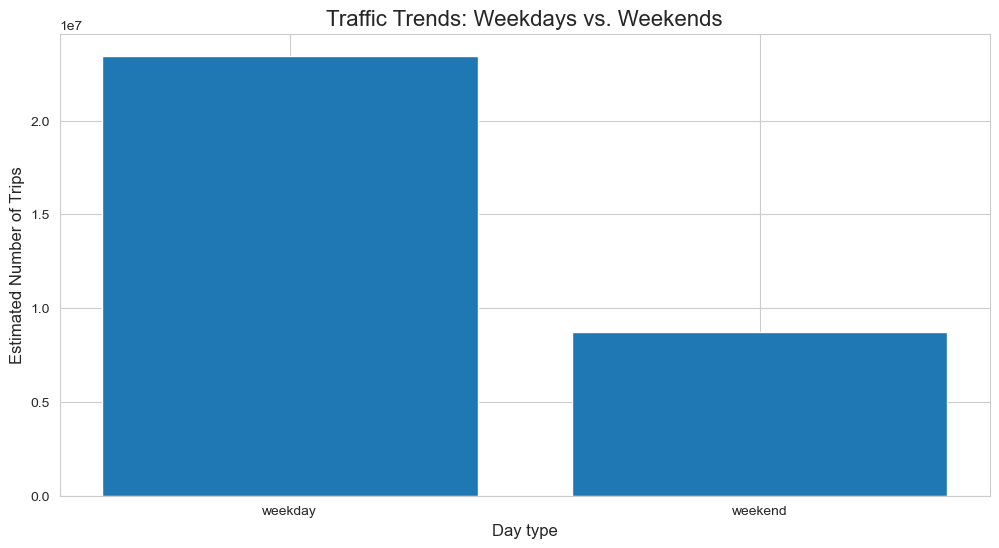

In [797]:
plt.figure(figsize=(12,6))
plt.bar(trips_by_day_type['day_type'], trips_by_day_type['scaled_trips'])
plt.title('Traffic Trends: Weekdays vs. Weekends', fontsize=16)
plt.xlabel('Day type', fontsize=12)
plt.ylabel('Estimated Number of Trips', fontsize=12)


plt.show()

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [798]:




df1['day_of_week'] = df1['tpep_pickup_datetime'].dt.dayofweek

# classify as weekday or weekend

df1['day_type'] = df1['day_of_week'].apply(lambda x: 'weekend' if x>=5 else 'weekday' )

trips_by_day_type = df1.groupby(['day_type',df1['tpep_pickup_datetime'].dt.hour] ).size().reset_index(name='num_trips')

sample_ratio = 0.05
trips_by_day_type['scaled_trips'] = (trips_by_day_type['num_trips']/ sample_ratio).astype(int)

trips_by_day_type

day_type  tpep_pickup_datetime  num_trips  scaled_trips
0   weekday                     0      20393        407860
1   weekday                     1      10706        214120
2   weekday                     2       5904        118080
3   weekday                     3       3397         67940
4   weekday                     4       2571         51420
5   weekday                     5       5309        106180
6   weekday                     6      16998        339960
7   weekday                     7      38929        778580
8   weekday                     8      53980       1079600
9   weekday                     9      56327       1126540
10  weekday                    10      56936       1138720
11  weekday                    11      59848       1196960
12  weekday                    12      63508       1270160
13  weekday                    13      64511       1290220
14  weekday                    14      69322       1386440
15  weekday                    15      72208       1444160
16  weekday                    16      71655       1433100
17  weekday                    17      82776       1655520
18  weekday                    18      90962       1819240
19  weekday                    19      79595       1591900
20  weekday                    20      69977       1399540
21  weekday                    21      70221       1404420
22  weekday                    22      62336       1246720
23  weekday                    23      44605        892100
24  weekend                     0      23283        465660
25  weekend                     1      19947        398940
26  weekend                     2      14553        291060
27  weekend                     3       9520        190400
28  weekend                     4       4593         91860
29  weekend                     5       1519         30380
30  weekend                     6       2709         54180
31  weekend                     7       4744         94880
32  weekend                     8       8343        166860
33  weekend                     9      13798        275960
34  weekend                    10      18907        378140
35  weekend                    11      22629        452580
36  weekend                    12      25129        502580
37  weekend                    13      25870        517400
38  weekend                    14      25609        512180
39  weekend                    15      25871        517420
40  weekend                    16      26415        528300
41  weekend                    17      27350        547000
42  weekend                    18      27590        551800
43  weekend                    19      25671        513420
44  weekend                    20      22054        441080
45  weekend                    21      21340        426800
46  weekend                    22      20551        411020
47  weekend                    23      17955        359100

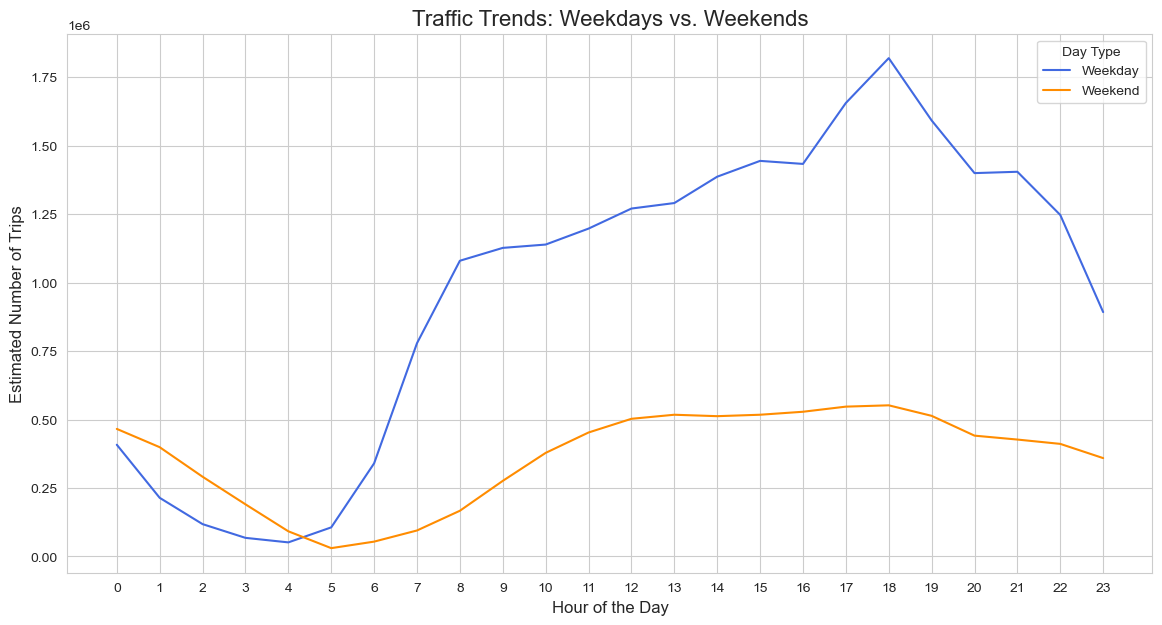

In [799]:

# Plotting
plt.figure(figsize=(14, 7))

# Plot Weekday Traffic
sns.lineplot(
    data=trips_by_day_type[trips_by_day_type['day_type'] == 'weekday'],
    x='tpep_pickup_datetime',
    y='scaled_trips',
    label='Weekday',
    color='royalblue'
)

# Plot Weekend Traffic
sns.lineplot(
    data=trips_by_day_type[trips_by_day_type['day_type'] == 'weekend'],
    x='tpep_pickup_datetime',
    y='scaled_trips',
    label='Weekend',
    color='darkorange'
)

# Labels and title
plt.title('Traffic Trends: Weekdays vs. Weekends', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Estimated Number of Trips', fontsize=12)
plt.xticks(range(0, 24))
plt.legend(title='Day Type')
plt.grid(True)
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [800]:
# Find top 10 pickup and dropoff zones

df1['dropoff_hour'] = df1['tpep_dropoff_datetime'].dt.hour

# Group by Pickup Zone and Hour
pickup_by_zone = df1.groupby(['PULocationID', 'pickup_hour']).size().reset_index(name='num_pickups')
pickup_by_zone['scaled_pickups'] = (pickup_by_zone['num_pickups'] / sampling_ratio).astype(int)

# Group by Dropoff Zone and Hour
dropoff_by_zone = df1.groupby(['DOLocationID', 'dropoff_hour']).size().reset_index(name='num_dropoffs')
dropoff_by_zone['scaled_dropoffs'] = (dropoff_by_zone['num_dropoffs'] / sampling_ratio).astype(int)

# Find top 10 pickup and dropoff zones
top_10_pickup_zones = pickup_by_zone.groupby('PULocationID')['scaled_pickups'].sum().nlargest(10).reset_index()
top_10_dropoff_zones = dropoff_by_zone.groupby('DOLocationID')['scaled_dropoffs'].sum().nlargest(10).reset_index()

# Display the result
print("\nTop 10 Zones by Hourly Pickups (Scaled):")
print(top_10_pickup_zones)

print("\nTop 10 Zones by Hourly Dropoffs (Scaled):")
print(top_10_dropoff_zones)



Top 10 Zones by Hourly Pickups (Scaled):
   PULocationID  scaled_pickups
0           237         1756220
1           161         1641880
2           236         1559940
3           162         1262040
4           142         1216300
5           186         1207340
6           230         1097160
7           170         1055820
8           163         1026940
9           239         1018540

Top 10 Zones by Hourly Dropoffs (Scaled):
   DOLocationID  scaled_dropoffs
0           236          1630780
1           237          1575320
2           161          1387140
3           170          1053420
4           142          1031960
5           162          1001820
6           239          1001240
7           230           967900
8           141           964780
9            68           899340


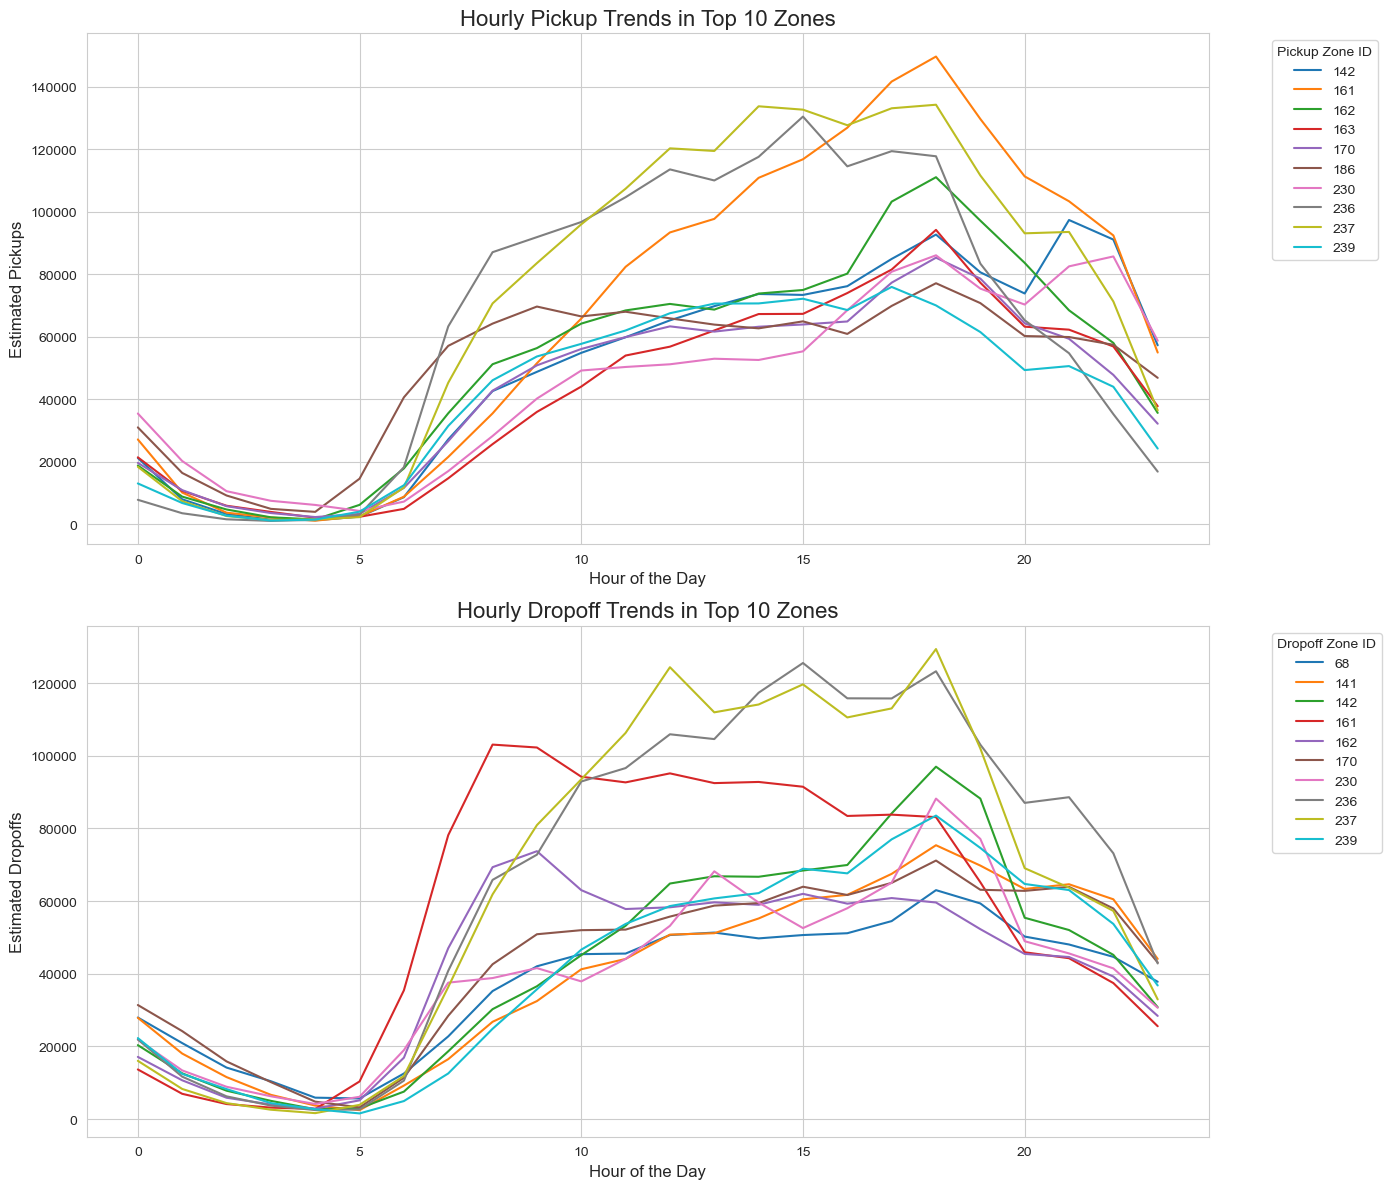

In [801]:
top_pickup_data = pickup_by_zone[pickup_by_zone['PULocationID'].isin(top_10_pickup_zones['PULocationID'])]
top_dropoff_data = dropoff_by_zone[dropoff_by_zone['DOLocationID'].isin(top_10_dropoff_zones['DOLocationID'])]

# Plotting
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# Pickup trends
sns.lineplot(
    data=top_pickup_data,
    x='pickup_hour',
    y='scaled_pickups',
    hue='PULocationID',
    palette='tab10',
    ax=axes[0]
)
axes[0].set_title('Hourly Pickup Trends in Top 10 Zones', fontsize=16)
axes[0].set_xlabel('Hour of the Day', fontsize=12)
axes[0].set_ylabel('Estimated Pickups', fontsize=12)
axes[0].legend(title='Pickup Zone ID', bbox_to_anchor=(1.05, 1), loc='upper left')

# Dropoff trends
sns.lineplot(
    data=top_dropoff_data,
    x='dropoff_hour',
    y='scaled_dropoffs',
    hue='DOLocationID',
    palette='tab10',
    ax=axes[1]
)
axes[1].set_title('Hourly Dropoff Trends in Top 10 Zones', fontsize=16)
axes[1].set_xlabel('Hour of the Day', fontsize=12)
axes[1].set_ylabel('Estimated Dropoffs', fontsize=12)
axes[1].legend(title='Dropoff Zone ID', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [802]:
# Find the top 10 and bottom 10 pickup/dropoff ratios


# Grouping by Pickup and Dropoff Zones
pickups_by_zone = df1.groupby('PULocationID').size().reset_index(name='num_pickups')
dropoffs_by_zone = df1.groupby('DOLocationID').size().reset_index(name='num_dropoffs')

# Scale the counts to actual trips
pickups_by_zone['scaled_pickups'] = (pickups_by_zone['num_pickups'] / sampling_ratio).astype(int)
dropoffs_by_zone['scaled_dropoffs'] = (dropoffs_by_zone['num_dropoffs'] / sampling_ratio).astype(int)

# Merging pickup and dropoff data
zone_ratio = pd.merge(
    pickups_by_zone, 
    dropoffs_by_zone, 
    left_on='PULocationID', 
    right_on='DOLocationID', 
    how='outer'
).fillna(0)

# Rename the columns for clarity
zone_ratio.rename(columns={'PULocationID': 'ZoneID'}, inplace=True)
zone_ratio.drop('DOLocationID', axis=1, inplace=True)

# Calculate the pickup/dropoff ratio
zone_ratio['pickup_drop_ratio'] = zone_ratio['scaled_pickups'] / zone_ratio['scaled_dropoffs'].replace(0, np.nan)

# Sorting for highest and lowest ratios
highest_ratios = zone_ratio.sort_values('pickup_drop_ratio', ascending=False).head(10)
lowest_ratios = zone_ratio.sort_values('pickup_drop_ratio', ascending=True).head(10)

# Display the results
print("\n🔥 Top 10 Zones with Highest Pickup/Dropoff Ratios:")
print(highest_ratios[['ZoneID', 'scaled_pickups', 'scaled_dropoffs', 'pickup_drop_ratio']])

print("\n❄️ Top 10 Zones with Lowest Pickup/Dropoff Ratios:")
print(lowest_ratios[['ZoneID', 'scaled_pickups', 'scaled_dropoffs', 'pickup_drop_ratio']])



🔥 Top 10 Zones with Highest Pickup/Dropoff Ratios:
     ZoneID  scaled_pickups  scaled_dropoffs  pickup_drop_ratio
124   138.0        101240.0          14400.0           7.030556
59     64.0           100.0             20.0           5.000000
118   132.0        127420.0          31500.0           4.045079
140   154.0           320.0            100.0           3.200000
8      11.0           240.0            100.0           2.400000
50     55.0           400.0            180.0           2.222222
46     51.0           860.0            420.0           2.047619
65     70.0         16460.0           8200.0           2.007317
12     15.0           120.0             60.0           2.000000
186   204.0            40.0             20.0           2.000000

❄️ Top 10 Zones with Lowest Pickup/Dropoff Ratios:
     ZoneID  scaled_pickups  scaled_dropoffs  pickup_drop_ratio
250     0.0             0.0             20.0           0.000000
248     0.0             0.0             40.0           0.000000


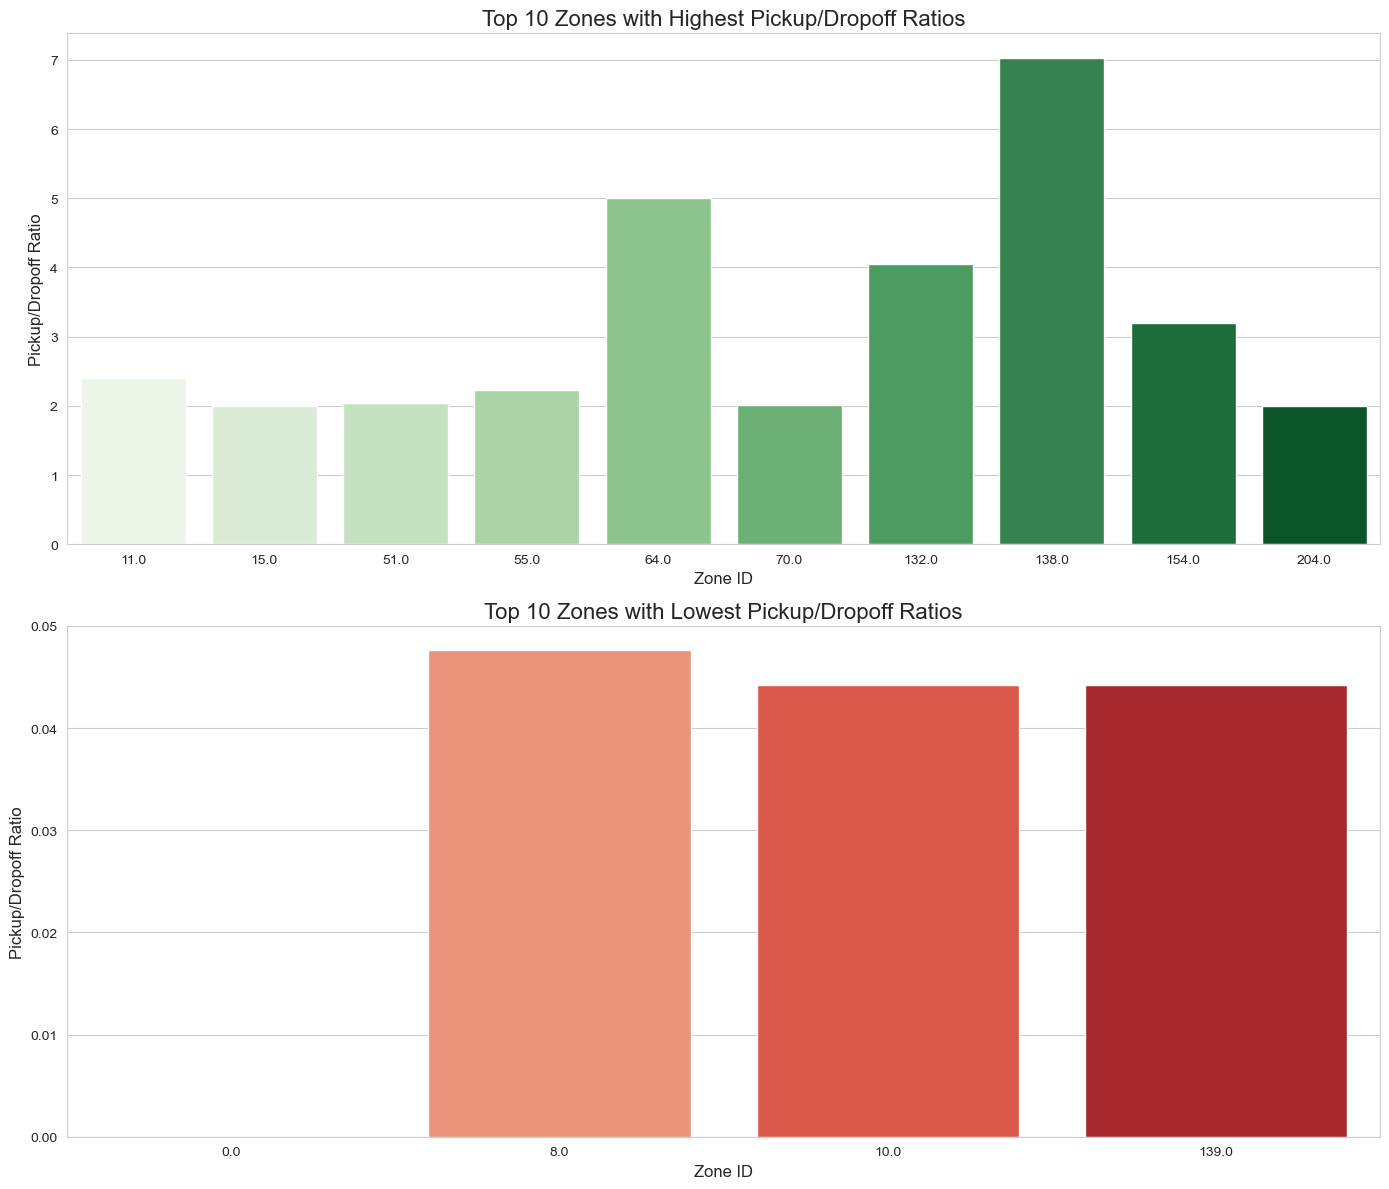

In [803]:
# Plotting the highest and lowest ratios
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# Highest ratios
sns.barplot(
    data=highest_ratios,
    x='ZoneID',
    y='pickup_drop_ratio',
    palette='Greens',
    ax=axes[0]
)
axes[0].set_title('Top 10 Zones with Highest Pickup/Dropoff Ratios', fontsize=16)
axes[0].set_xlabel('Zone ID', fontsize=12)
axes[0].set_ylabel('Pickup/Dropoff Ratio', fontsize=12)

# Lowest ratios
sns.barplot(
    data=lowest_ratios,
    x='ZoneID',
    y='pickup_drop_ratio',
    palette='Reds',
    ax=axes[1]
)
axes[1].set_title('Top 10 Zones with Lowest Pickup/Dropoff Ratios', fontsize=16)
axes[1].set_xlabel('Zone ID', fontsize=12)
axes[1].set_ylabel('Pickup/Dropoff Ratio', fontsize=12)

plt.tight_layout()
plt.show()


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [804]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# Filtering for night hours (23:00 to 05:00)
night_hours = df1[(df1['pickup_hour'] >= 23) | (df1['pickup_hour'] < 5)]

# Counting pickups and dropoffs during night hours
night_pickups = night_hours.groupby('PULocationID').size().reset_index(name='night_pickups')
night_dropoffs = night_hours.groupby('DOLocationID').size().reset_index(name='night_dropoffs')

# Merging with zone data to add zone names
night_pickups = night_pickups.merge(zones, left_on='PULocationID', right_on='LocationID', how='left')
night_dropoffs = night_dropoffs.merge(zones, left_on='DOLocationID', right_on='LocationID', how='left')

# Sorting and selecting top 10 zones
top_night_pickups = night_pickups.sort_values('night_pickups', ascending=False).head(10)
top_night_dropoffs = night_dropoffs.sort_values('night_dropoffs', ascending=False).head(10)

# Displaying the results
print("\n Top 10 Night Pickup Zones:")
print(top_night_pickups[['zone', 'night_pickups']])

print("\n Top 10 Night Dropoff Zones:")
print(top_night_dropoffs[['zone', 'night_dropoffs']])



 Top 10 Night Pickup Zones:
                             zone  night_pickups
59                   East Village          14990
182                  West Village          11888
108               Lower East Side           9095
32                   Clinton East           8863
82        Greenwich Village South           8512
166     Times Sq/Theatre District           6940
122                 Midtown South           5695
137  Penn Station/Madison Sq West           5624
49                   East Chelsea           5378
78                       Gramercy           5321

 Top 10 Night Dropoff Zones:
                zone  night_dropoffs
63      East Village            8393
34      Clinton East            6601
136      Murray Hill            6093
83          Gramercy            5689
52      East Chelsea            5507
110  Lenox Hill West            5118
200     West Village            4986
212   Yorkville West            4617
117  Lower East Side            4304
72          Flatiron            

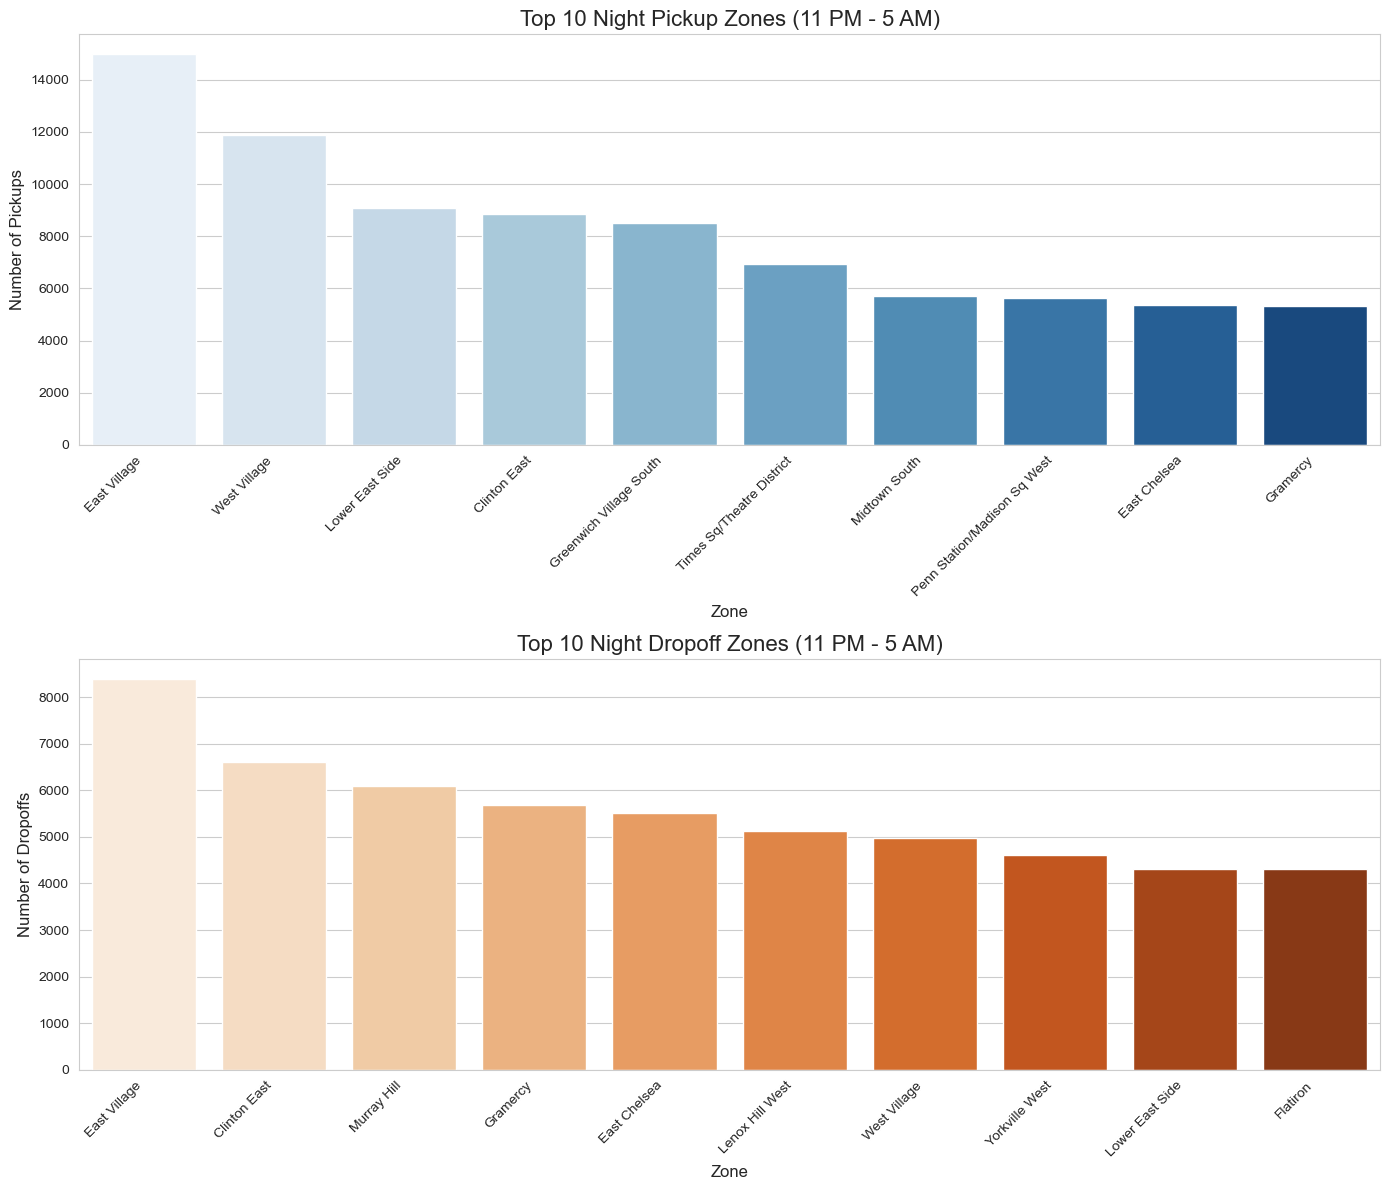

In [805]:


# Plotting the night pickups and dropoffs
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# Night pickups
sns.barplot(
    data=top_night_pickups,
    x='zone',
    y='night_pickups',
    palette='Blues',
    ax=axes[0]
)
axes[0].set_title('Top 10 Night Pickup Zones (11 PM - 5 AM)', fontsize=16)
axes[0].set_xlabel('Zone', fontsize=12)
axes[0].set_ylabel('Number of Pickups', fontsize=12)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

# Night dropoffs
sns.barplot(
    data=top_night_dropoffs,
    x='zone',
    y='night_dropoffs',
    palette='Oranges',
    ax=axes[1]
)
axes[1].set_title('Top 10 Night Dropoff Zones (11 PM - 5 AM)', fontsize=16)
axes[1].set_xlabel('Zone', fontsize=12)
axes[1].set_ylabel('Number of Dropoffs', fontsize=12)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [806]:
# Filter for night hours (11 PM to 5 AM)

# Nighttime hours (11 PM - 5 AM)
night_revenue = df1[(df1['pickup_hour'] >= 23) | (df1['pickup_hour'] < 5)]['total_amount'].sum()

# Daytime hours (5 AM - 11 PM)
day_revenue = df1[(df1['pickup_hour'] >= 5) & (df1['pickup_hour'] < 23)]['total_amount'].sum()

# Calculate total revenue
total_revenue = night_revenue + day_revenue

# Calculate revenue share percentages
night_share = (night_revenue / total_revenue) * 100
day_share = (day_revenue / total_revenue) * 100

# Display results
print(f" Nighttime Revenue: ${night_revenue:,.2f} ({night_share:.2f}%)")
print(f" Daytime Revenue: ${day_revenue:,.2f} ({day_share:.2f}%)")
print(f" Total Revenue: ${total_revenue:,.2f}")

 Nighttime Revenue: $3,645,842.63 (11.12%)
 Daytime Revenue: $29,138,475.47 (88.88%)
 Total Revenue: $32,784,318.10


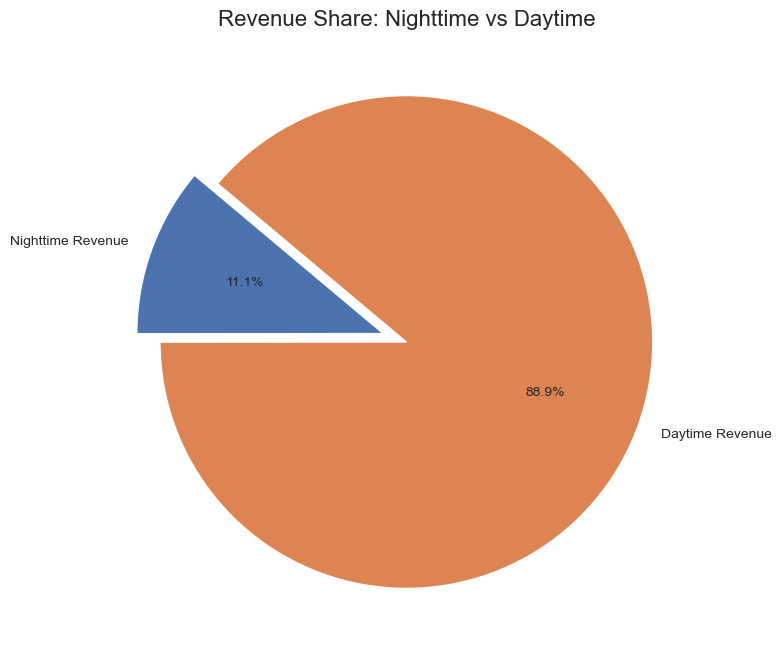

In [807]:
# Data for pie chart
labels = ['Nighttime Revenue', 'Daytime Revenue']
sizes = [night_revenue, day_revenue]
colors = ['#4c72b0', '#dd8452']
explode = (0.1, 0)  # Highlight the nighttime revenue slice

# Plotting the pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
ax.set_title('Revenue Share: Nighttime vs Daytime', fontsize=16)
plt.show()

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [808]:
# Analyse the fare per mile per passenger for different passenger counts

# Filter out invalid entries
valid_trips = df1[(df1['trip_distance'] > 0) & (df1['passenger_count'] > 0)]

# Calculate fare per mile and fare per mile per passenger
valid_trips['fare_per_mile'] = valid_trips['fare_amount'] / valid_trips['trip_distance']
valid_trips['fare_per_mile_per_passenger'] = valid_trips['fare_per_mile'] / valid_trips['passenger_count']

# Group by passenger count and calculate average fare per mile per passenger
fare_per_passenger = valid_trips.groupby('passenger_count').agg(
    avg_fare_per_mile=('fare_per_mile', 'mean'),
    avg_fare_per_mile_per_passenger=('fare_per_mile_per_passenger', 'mean')
).reset_index()

# Display results
print("🚖 Average Fare per Mile and Fare per Mile per Passenger by Passenger Count:")
print(fare_per_passenger)


🚖 Average Fare per Mile and Fare per Mile per Passenger by Passenger Count:
   passenger_count  avg_fare_per_mile  avg_fare_per_mile_per_passenger
0              1.0           8.890701                         8.890701
1              2.0           8.900297                         4.450148
2              3.0           9.565048                         3.188349
3              4.0           9.447194                         2.361798
4              5.0           8.381130                         1.676226
5              6.0           8.536532                         1.422755


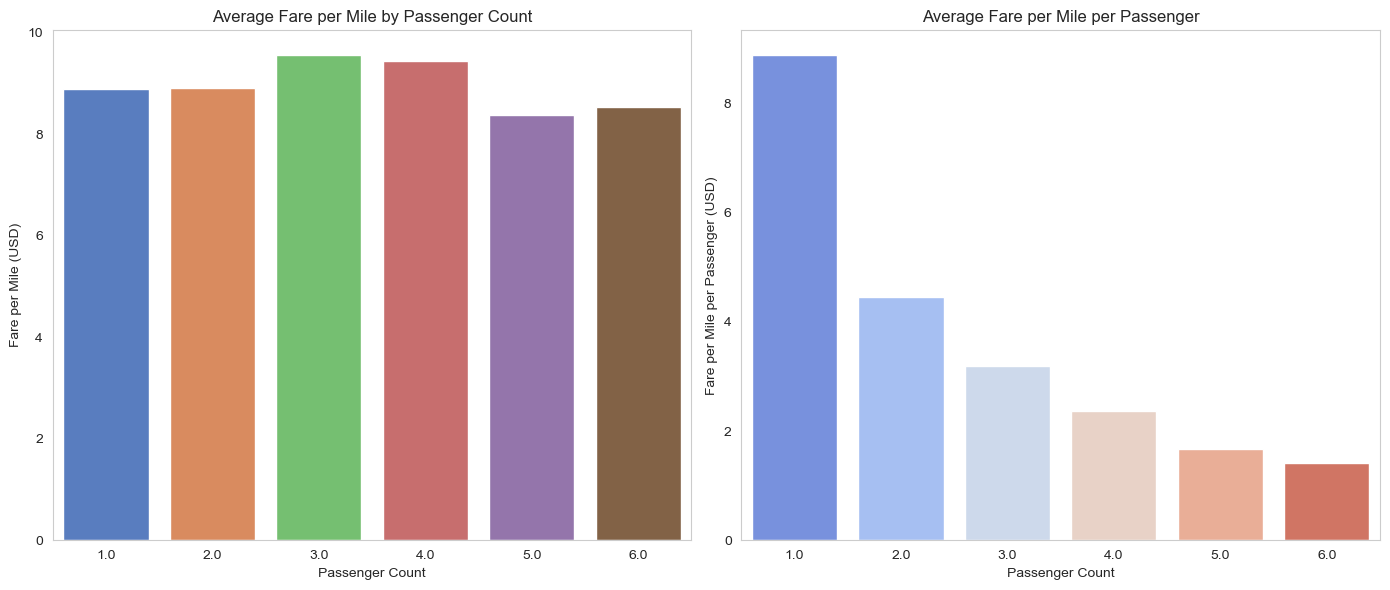

In [809]:

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Barplot for avg fare per mile
sns.barplot(x='passenger_count', y='avg_fare_per_mile', data=fare_per_passenger, ax=ax[0], palette='muted')
ax[0].set_title('Average Fare per Mile by Passenger Count')
ax[0].set_xlabel('Passenger Count')
ax[0].set_ylabel('Fare per Mile (USD)')
ax[0].grid(axis='y')

# Barplot for avg fare per mile per passenger
sns.barplot(x='passenger_count', y='avg_fare_per_mile_per_passenger', data=fare_per_passenger, ax=ax[1], palette='coolwarm')
ax[1].set_title('Average Fare per Mile per Passenger')
ax[1].set_xlabel('Passenger Count')
ax[1].set_ylabel('Fare per Mile per Passenger (USD)')
ax[1].grid(axis='y')

plt.tight_layout()
plt.show()

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [810]:
# Compare the average fare per mile for different days and for different times of the day

# Filter out invalid trips
valid_trips = df1[(df1['trip_distance'] > 0) & (df1['fare_amount'] > 0)]

# Calculate fare per mile
valid_trips['fare_per_mile'] = valid_trips['fare_amount'] / valid_trips['trip_distance']

# Extract day of week and hour of day
valid_trips['day_of_week'] = valid_trips['tpep_pickup_datetime'].dt.dayofweek
valid_trips['hour_of_day'] = valid_trips['tpep_pickup_datetime'].dt.hour

# Group by day of week and hour of day
fare_by_day_hour = valid_trips.groupby(['day_of_week', 'hour_of_day']).agg(
    avg_fare_per_mile=('fare_per_mile', 'mean')
).reset_index()

# Map day numbers to labels
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fare_by_day_hour['day_of_week'] = fare_by_day_hour['day_of_week'].map(lambda x: day_labels[x])

# Display sample data
print("🚖 Average Fare per Mile by Day and Hour:")
print(fare_by_day_hour.head())

🚖 Average Fare per Mile by Day and Hour:
  day_of_week  hour_of_day  avg_fare_per_mile
0      Monday            0           7.113255
1      Monday            1           7.224347
2      Monday            2           7.132948
3      Monday            3           8.015729
4      Monday            4           7.851208


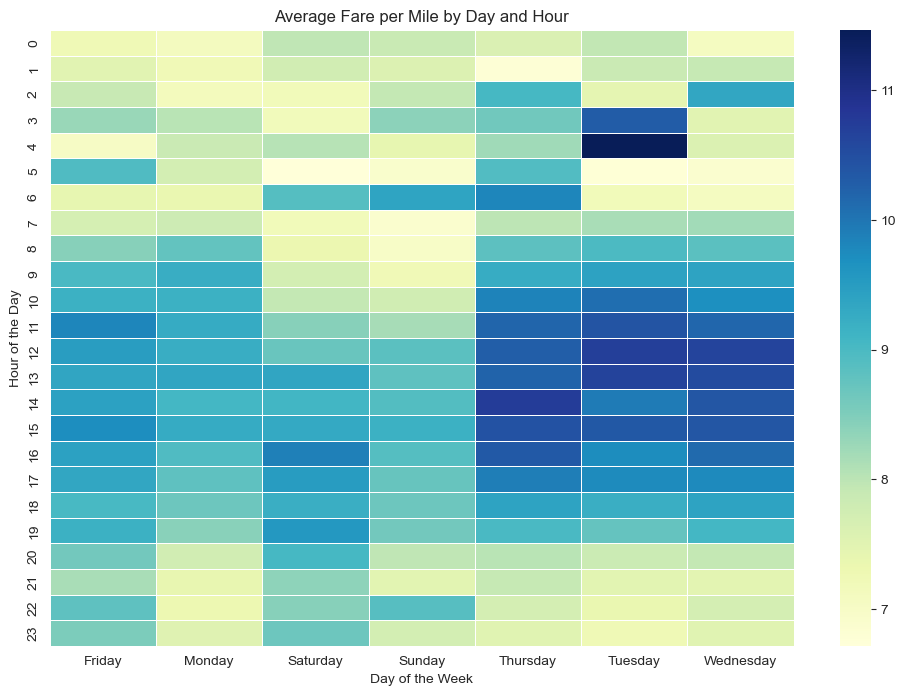

In [811]:
heatmap_data = fare_by_day_hour.pivot('hour_of_day', 'day_of_week', 'avg_fare_per_mile')

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False, fmt=".2f", linewidths=0.5, ax=ax)

plt.title('Average Fare per Mile by Day and Hour')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.show()

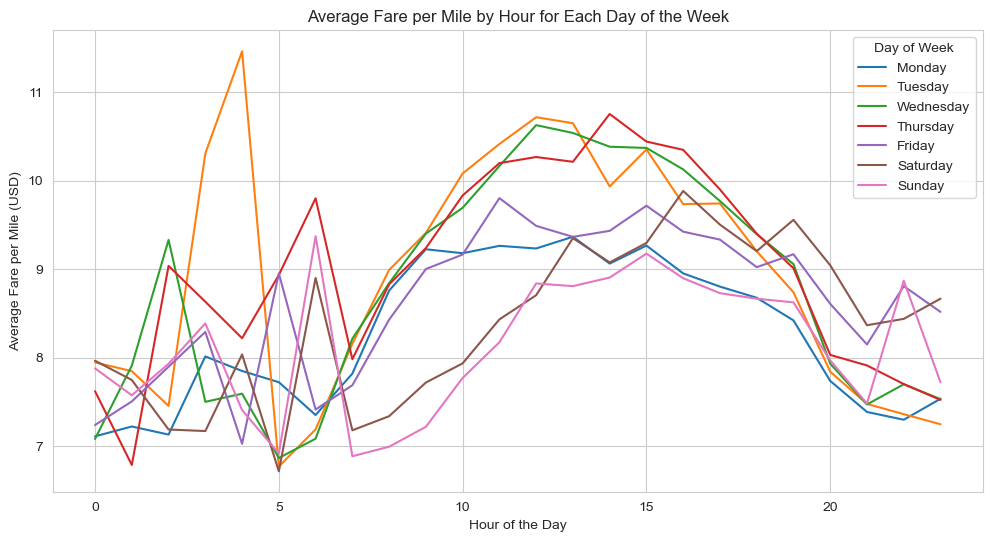

In [812]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(x='hour_of_day', y='avg_fare_per_mile', hue='day_of_week', data=fare_by_day_hour, palette='tab10')

plt.title('Average Fare per Mile by Hour for Each Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare per Mile (USD)')
plt.legend(title='Day of Week')
plt.grid(True)
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [813]:
# Compare fare per mile for different vendors

# Filter valid trips
valid_trips = df1[(df1['trip_distance'] > 0) & (df1['fare_amount'] > 0)]

# Calculate fare per mile
valid_trips['fare_per_mile'] = valid_trips['fare_amount'] / valid_trips['trip_distance']

# Extract hour of day
valid_trips['hour_of_day'] = valid_trips['tpep_pickup_datetime'].dt.hour

# Group by VendorID and hour
fare_by_vendor_hour = valid_trips.groupby(['VendorID', 'hour_of_day']).agg(
    avg_fare_per_mile=('fare_per_mile', 'mean')
).reset_index()

# Display sample data
print("🚖 Average Fare per Mile by Vendor and Hour:")
print(fare_by_vendor_hour.head())

🚖 Average Fare per Mile by Vendor and Hour:
   VendorID  hour_of_day  avg_fare_per_mile
0         1            0           7.082016
1         1            1           7.005206
2         1            2           6.918733
3         1            3           6.794738
4         1            4           6.903373


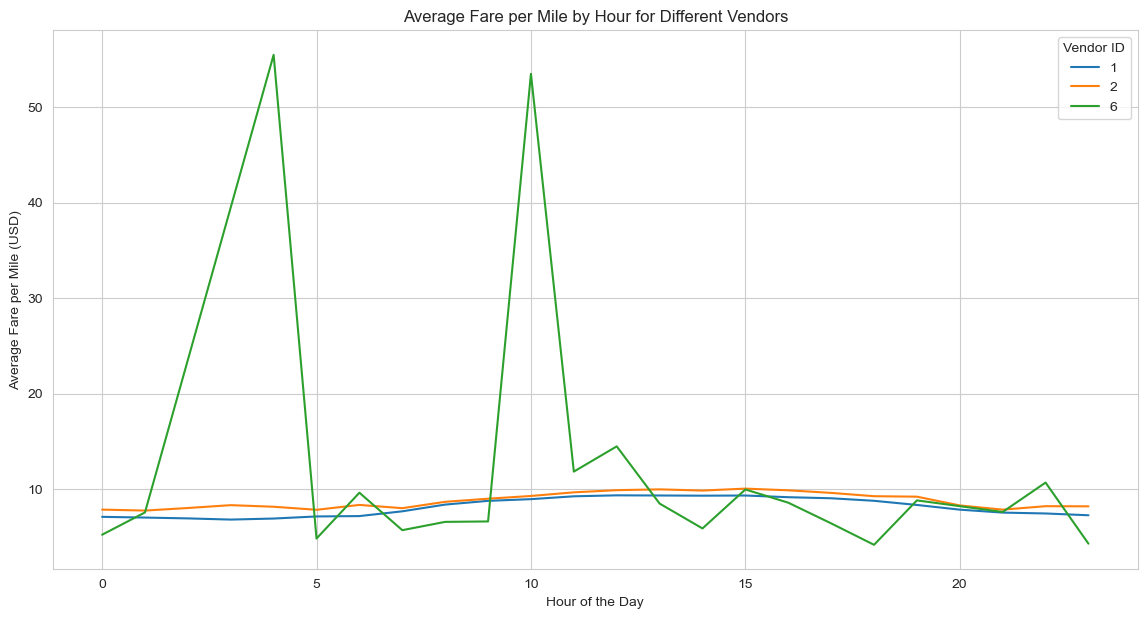

In [814]:
fig, ax = plt.subplots(figsize=(14, 7))

# Line plot
sns.lineplot(
    x='hour_of_day', 
    y='avg_fare_per_mile', 
    hue='VendorID', 
    data=fare_by_vendor_hour, 
    palette='tab10'
)

plt.title('Average Fare per Mile by Hour for Different Vendors')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare per Mile (USD)')
plt.legend(title='Vendor ID')
plt.grid(True)
plt.show()

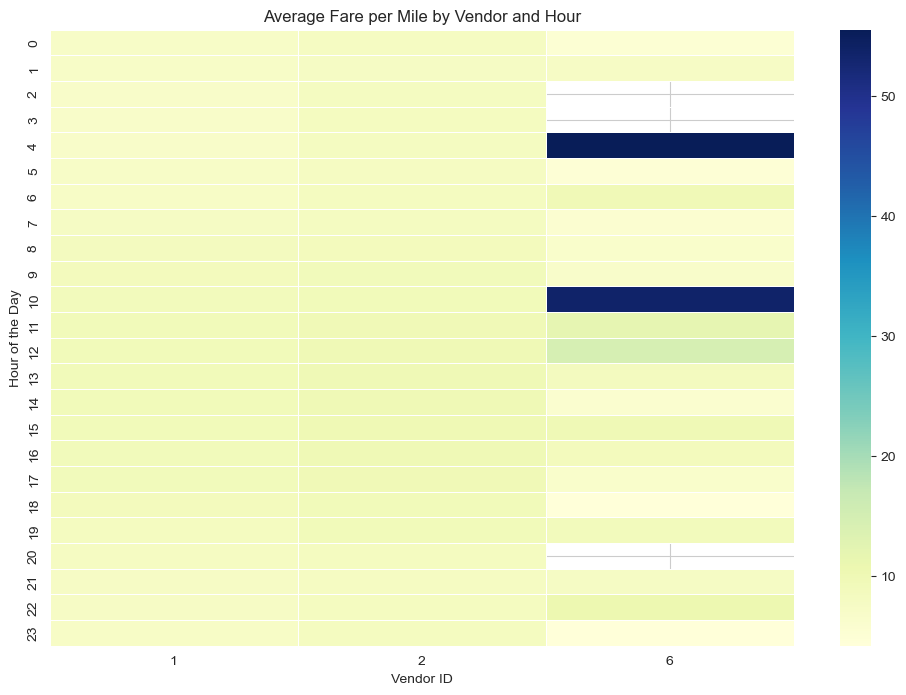

In [815]:
heatmap_data = fare_by_vendor_hour.pivot('hour_of_day', 'VendorID', 'avg_fare_per_mile')

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False, fmt=".2f", linewidths=0.5, ax=ax)

plt.title('Average Fare per Mile by Vendor and Hour')
plt.xlabel('Vendor ID')
plt.ylabel('Hour of the Day')
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [816]:
# Defining distance tiers

# Filter valid trips
valid_trips = df1[(df1['trip_distance'] > 0) & (df1['fare_amount'] > 0)]

# Create distance tiers
def categorize_distance(distance):
    if distance <= 2:
        return '0-2 miles'
    elif 2 < distance <= 5:
        return '2-5 miles'
    else:
        return '5+ miles'

# Categorizing distances
valid_trips['distance_tier'] = valid_trips['trip_distance'].apply(categorize_distance)

# Calculate fare per mile
valid_trips['fare_per_mile'] = valid_trips['fare_amount'] / valid_trips['trip_distance']

# Group by VendorID and distance tier
tiered_fare_by_vendor = valid_trips.groupby(['VendorID', 'distance_tier']).agg(
    avg_fare_per_mile=('fare_per_mile', 'mean'),
    trip_count=('fare_per_mile', 'count')
).reset_index()

# Display the result
print("🚖 Average Fare per Mile by Vendor and Distance Tier:")
print(tiered_fare_by_vendor)

🚖 Average Fare per Mile by Vendor and Distance Tier:
   VendorID distance_tier  avg_fare_per_mile  trip_count
0         1     0-2 miles           9.598674      295161
1         1     2-5 miles           6.277167      129203
2         1      5+ miles           4.840179        5842
3         2     0-2 miles          10.474948      773107
4         2     2-5 miles           6.418239      388153
5         2      5+ miles           4.896264       17386
6         6     0-2 miles          35.784945          15
7         6     2-5 miles           6.652707          52
8         6      5+ miles           3.913906           5


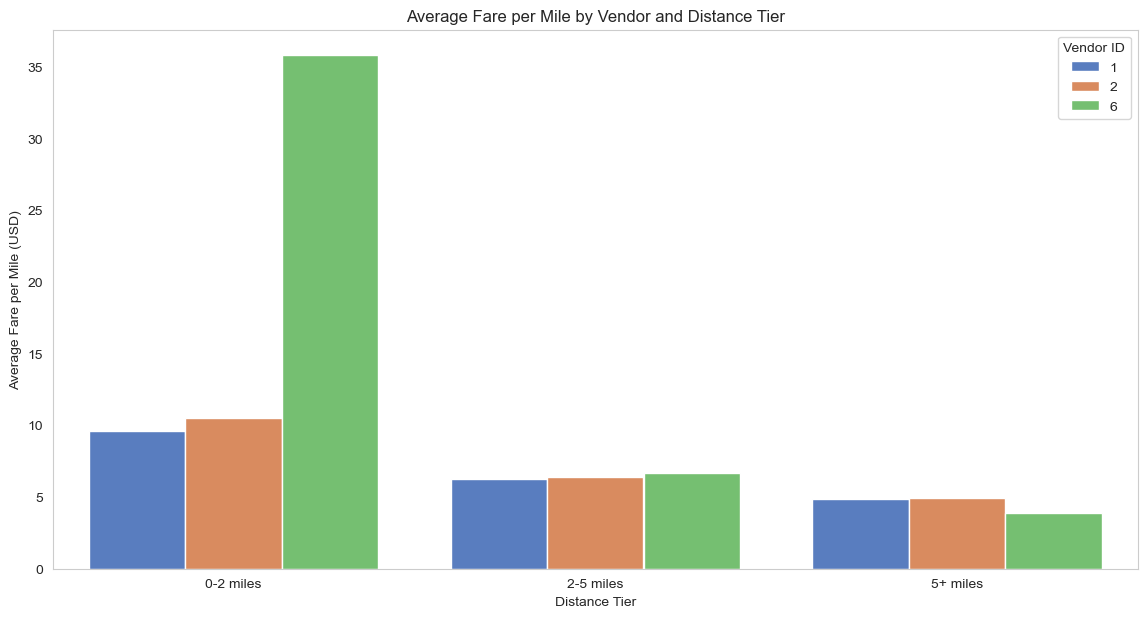

In [817]:
fig, ax = plt.subplots(figsize=(14, 7))

# Barplot
sns.barplot(
    x='distance_tier', 
    y='avg_fare_per_mile', 
    hue='VendorID', 
    data=tiered_fare_by_vendor, 
    palette='muted'
)

plt.title('Average Fare per Mile by Vendor and Distance Tier')
plt.xlabel('Distance Tier')
plt.ylabel('Average Fare per Mile (USD)')
plt.legend(title='Vendor ID')
plt.grid(axis='y')
plt.show()

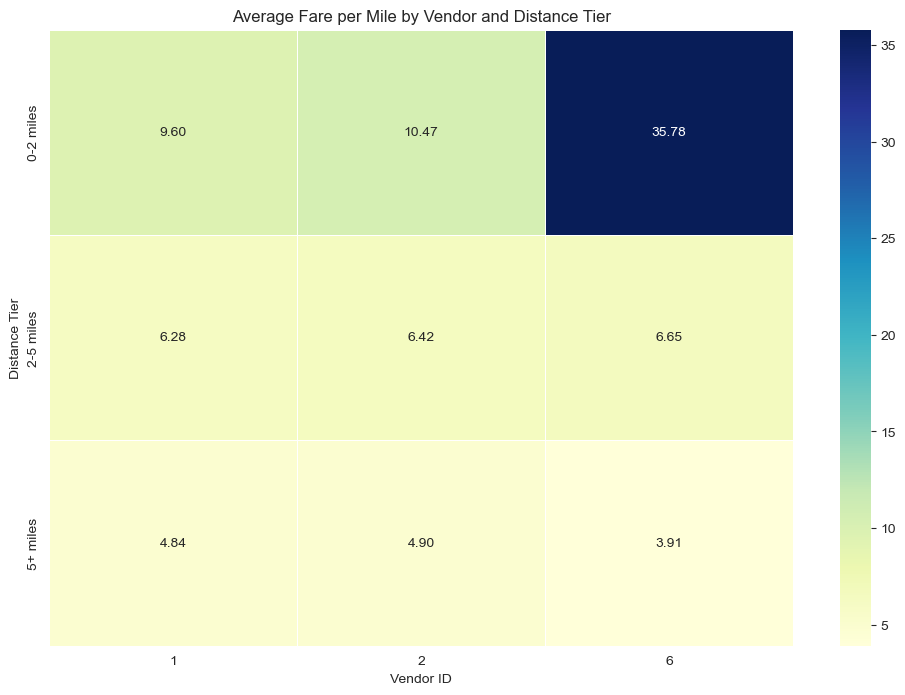

In [818]:
heatmap_data = tiered_fare_by_vendor.pivot('distance_tier', 'VendorID', 'avg_fare_per_mile')

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=0.5, ax=ax)

plt.title('Average Fare per Mile by Vendor and Distance Tier')
plt.xlabel('Vendor ID')
plt.ylabel('Distance Tier')
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [819]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

# Filter valid trips
valid_trips = df1[(df1['fare_amount'] > 0) & (df1['tip_amount'] >= 0)]

# Calculate tip percentage
valid_trips['tip_percentage'] = (valid_trips['tip_amount'] / valid_trips['fare_amount']) * 100

# Categorize distance tiers
def categorize_distance(distance):
    if distance <= 2:
        return '0-2 miles'
    elif 2 < distance <= 5:
        return '2-5 miles'
    else:
        return '5+ miles'

valid_trips['distance_tier'] = valid_trips['trip_distance'].apply(categorize_distance)

# Categorize pickup time into time of day
def categorize_time(hour):
    if 5 <= hour < 11:
        return 'Morning (5 AM - 11 AM)'
    elif 11 <= hour < 17:
        return 'Afternoon (11 AM - 5 PM)'
    elif 17 <= hour < 23:
        return 'Evening (5 PM - 11 PM)'
    else:
        return 'Night (11 PM - 5 AM)'

valid_trips['time_of_day'] = valid_trips['tpep_pickup_datetime'].dt.hour.apply(categorize_time)

# Group by distance tier, passenger count, and time of day
tip_analysis = valid_trips.groupby(['distance_tier', 'passenger_count', 'time_of_day']).agg(
    avg_tip_percentage=('tip_percentage', 'mean'),
    trip_count=('tip_percentage', 'count')
).reset_index()

# Display result
print(" Tip Percentages by Distance, Passenger Count, and Time of Day:")
print(tip_analysis)


 Tip Percentages by Distance, Passenger Count, and Time of Day:
   distance_tier  passenger_count               time_of_day  \
0      0-2 miles              0.0  Afternoon (11 AM - 5 PM)   
1      0-2 miles              0.0    Evening (5 PM - 11 PM)   
2      0-2 miles              0.0    Morning (5 AM - 11 AM)   
3      0-2 miles              0.0      Night (11 PM - 5 AM)   
4      0-2 miles              1.0  Afternoon (11 AM - 5 PM)   
..           ...              ...                       ...   
79      5+ miles              5.0      Night (11 PM - 5 AM)   
80      5+ miles              6.0  Afternoon (11 AM - 5 PM)   
81      5+ miles              6.0    Evening (5 PM - 11 PM)   
82      5+ miles              6.0    Morning (5 AM - 11 AM)   
83      5+ miles              6.0      Night (11 PM - 5 AM)   

    avg_tip_percentage  trip_count  
0            20.138785        7574  
1            22.619399        6145  
2            20.559045        3742  
3            22.661145        1

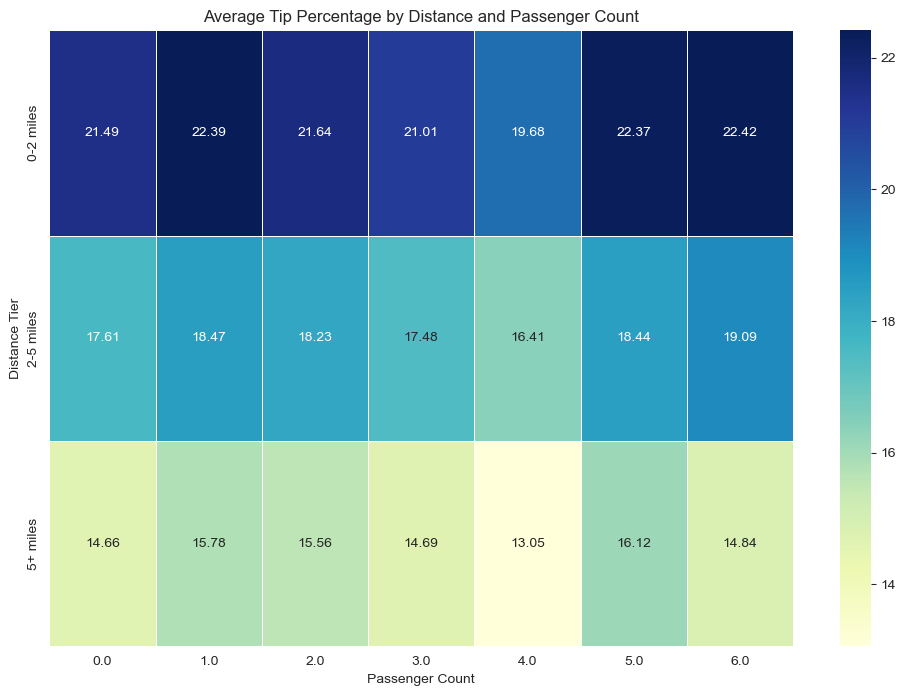

In [820]:
heatmap_data = tip_analysis.pivot_table(
    values='avg_tip_percentage', 
    index='distance_tier', 
    columns='passenger_count', 
    aggfunc='mean'
)

# Plotting the heatmap
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)

plt.title('Average Tip Percentage by Distance and Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Distance Tier')
plt.show()

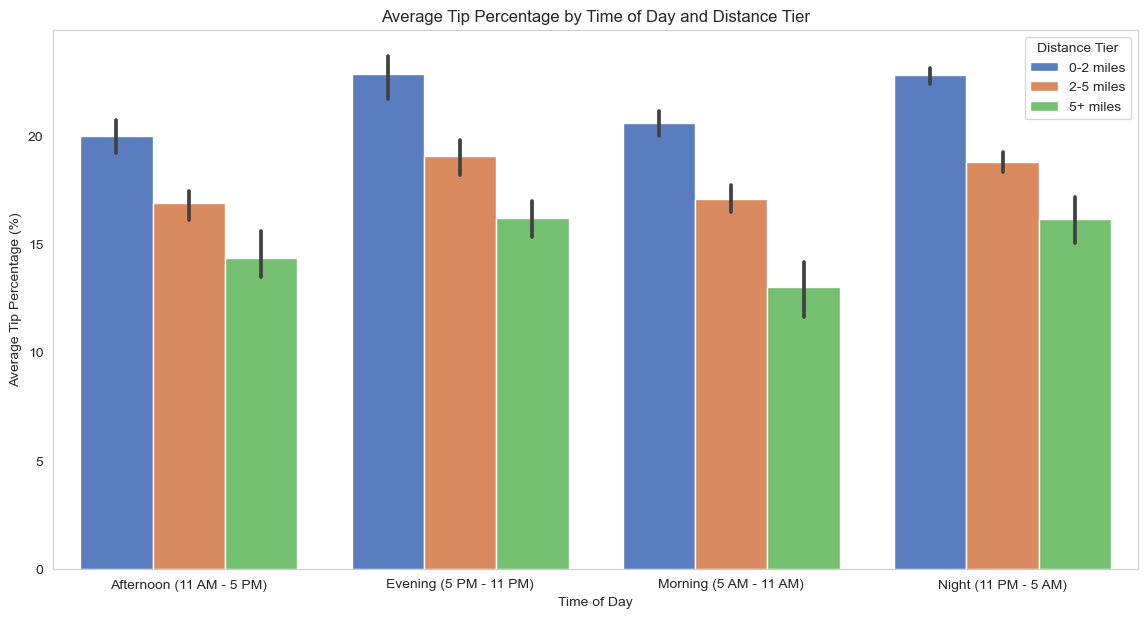

In [821]:
fig, ax = plt.subplots(figsize=(14, 7))

# Barplot
sns.barplot(
    x='time_of_day', 
    y='avg_tip_percentage', 
    hue='distance_tier', 
    data=tip_analysis, 
    palette='muted'
)

plt.title('Average Tip Percentage by Time of Day and Distance Tier')
plt.xlabel('Time of Day')
plt.ylabel('Average Tip Percentage (%)')
plt.legend(title='Distance Tier')
plt.grid(axis='y')
plt.show()

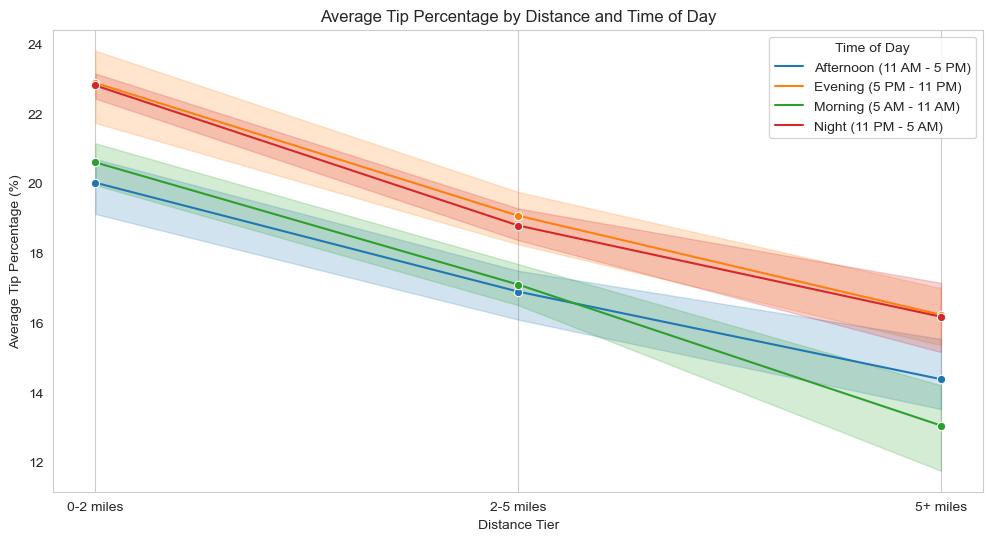

In [822]:
fig, ax = plt.subplots(figsize=(12, 6))

# Line plot
sns.lineplot(
    x='distance_tier', 
    y='avg_tip_percentage', 
    hue='time_of_day', 
    data=tip_analysis, 
    marker='o'
)

plt.title('Average Tip Percentage by Distance and Time of Day')
plt.xlabel('Distance Tier')
plt.ylabel('Average Tip Percentage (%)')
plt.legend(title='Time of Day')
plt.grid(axis='y')
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [823]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

# Filter valid trips
valid_trips = df1[(df1['fare_amount'] > 0) & (df1['tip_amount'] >= 0)]

# Calculate tip percentage
valid_trips['tip_percentage'] = (valid_trips['tip_amount'] / valid_trips['fare_amount']) * 100

# Classify into low and high tip groups
low_tips = valid_trips[valid_trips['tip_percentage'] < 10]
high_tips = valid_trips[valid_trips['tip_percentage'] >= 25]

# Aggregating statistics
low_tips_stats = low_tips.describe()
high_tips_stats = high_tips.describe()

# Displaying basic statistics
print("\n🔥 Low Tip Statistics (Tip < 10%):")
print(low_tips_stats)

print("\n💰 High Tip Statistics (Tip >= 25%):")
print(high_tips_stats)



🔥 Low Tip Statistics (Tip < 10%):
            VendorID  passenger_count  trip_distance     RatecodeID  \
count  402003.000000    402003.000000  402003.000000  402003.000000   
mean        1.722932         1.388796       1.819736       1.004604   
std         0.451535         0.919049       1.172094       0.127767   
min         1.000000         0.000000       0.010000       1.000000   
25%         1.000000         1.000000       0.940000       1.000000   
50%         2.000000         1.000000       1.520000       1.000000   
75%         2.000000         1.000000       2.400000       1.000000   
max         6.000000         6.000000       5.600000       5.000000   

        PULocationID   DOLocationID   payment_type    fare_amount  \
count  402003.000000  402003.000000  402003.000000  402003.000000   
mean      165.124141     162.387820       1.771663      13.296566   
std        66.175080      69.456392       0.600451       5.948871   
min         1.000000       1.000000       1.00000

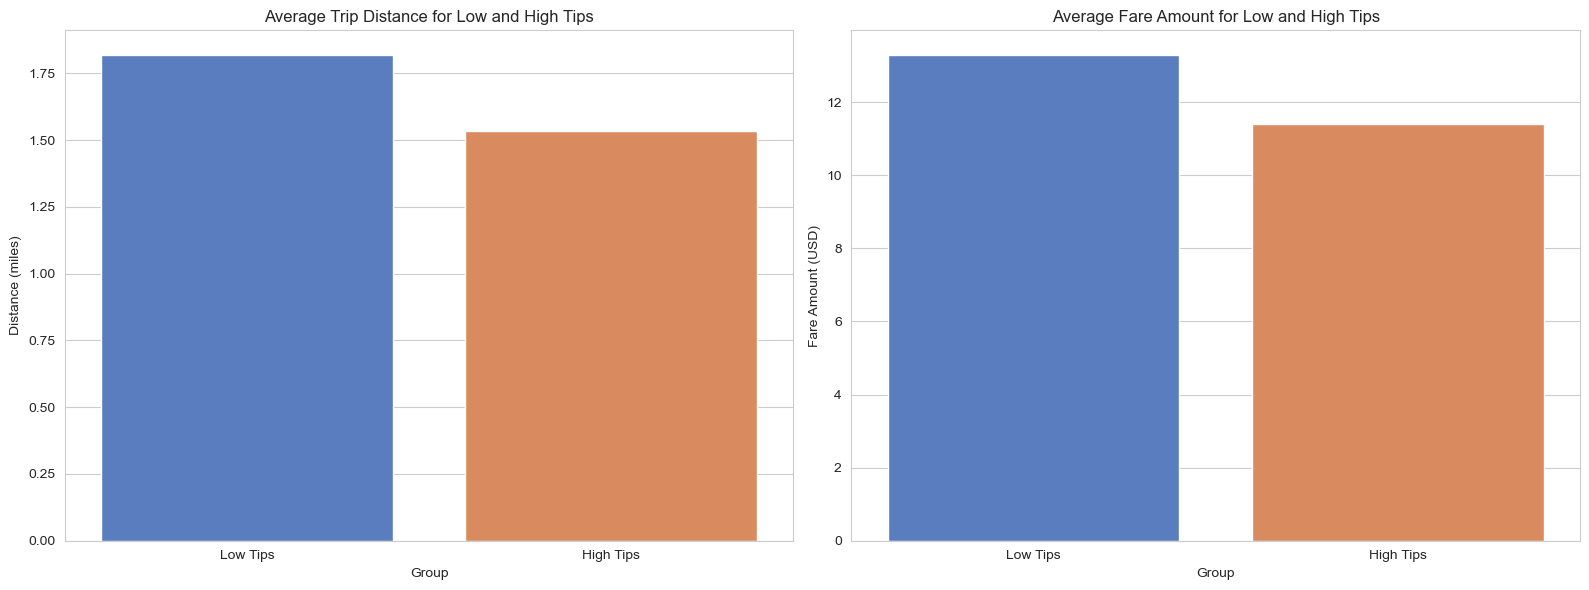

In [824]:


# Prepare data for visualization
tip_comparison = pd.DataFrame({
    'Group': ['Low Tips', 'High Tips'],
    'Avg Trip Distance': [low_tips['trip_distance'].mean(), high_tips['trip_distance'].mean()],
    'Avg Fare Amount': [low_tips['fare_amount'].mean(), high_tips['fare_amount'].mean()],
    'Avg Tip Percentage': [low_tips['tip_percentage'].mean(), high_tips['tip_percentage'].mean()],
    'Avg Passenger Count': [low_tips['passenger_count'].mean(), high_tips['passenger_count'].mean()]
})

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Trip Distance
sns.barplot(x='Group', y='Avg Trip Distance', data=tip_comparison, ax=axes[0], palette='muted')
axes[0].set_title('Average Trip Distance for Low and High Tips')
axes[0].set_ylabel('Distance (miles)')

# Fare Amount
sns.barplot(x='Group', y='Avg Fare Amount', data=tip_comparison, ax=axes[1], palette='muted')
axes[1].set_title('Average Fare Amount for Low and High Tips')
axes[1].set_ylabel('Fare Amount (USD)')

plt.tight_layout()
plt.show()


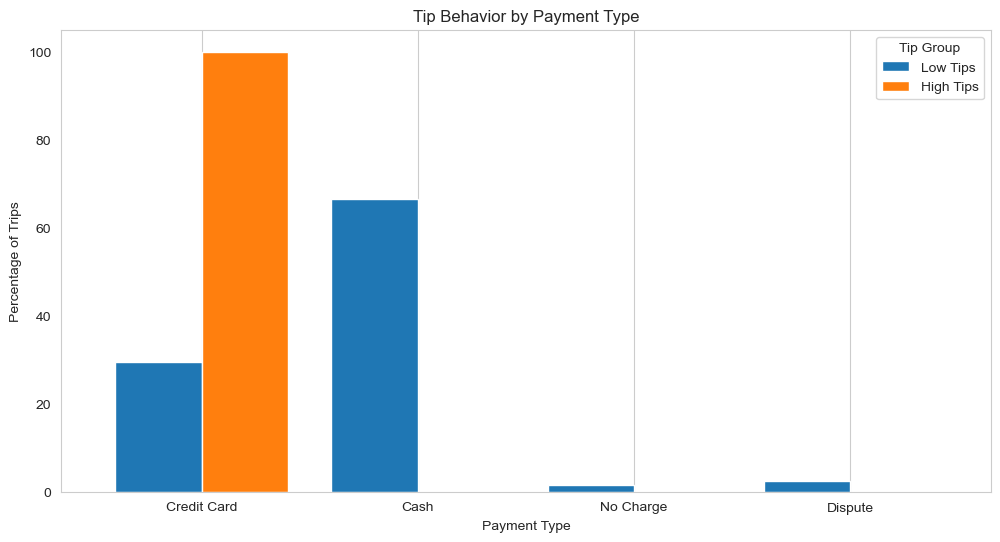

In [825]:
fig, ax = plt.subplots(figsize=(12, 6))

# Grouping by payment type
low_tips_payments = low_tips['payment_type'].value_counts(normalize=True) * 100
high_tips_payments = high_tips['payment_type'].value_counts(normalize=True) * 100

# Merging into a dataframe for visualization
payment_comparison = pd.DataFrame({'Low Tips': low_tips_payments, 'High Tips': high_tips_payments}).fillna(0)

# Plotting
payment_comparison.plot(kind='bar', ax=ax, width=0.8)
plt.title('Tip Behavior by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Percentage of Trips')
plt.legend(title='Tip Group')
plt.xticks(ticks=range(len(payment_comparison.index)), labels=['Credit Card', 'Cash', 'No Charge', 'Dispute'], rotation=0)
plt.grid(axis='y')
plt.show()


ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of labels (2).

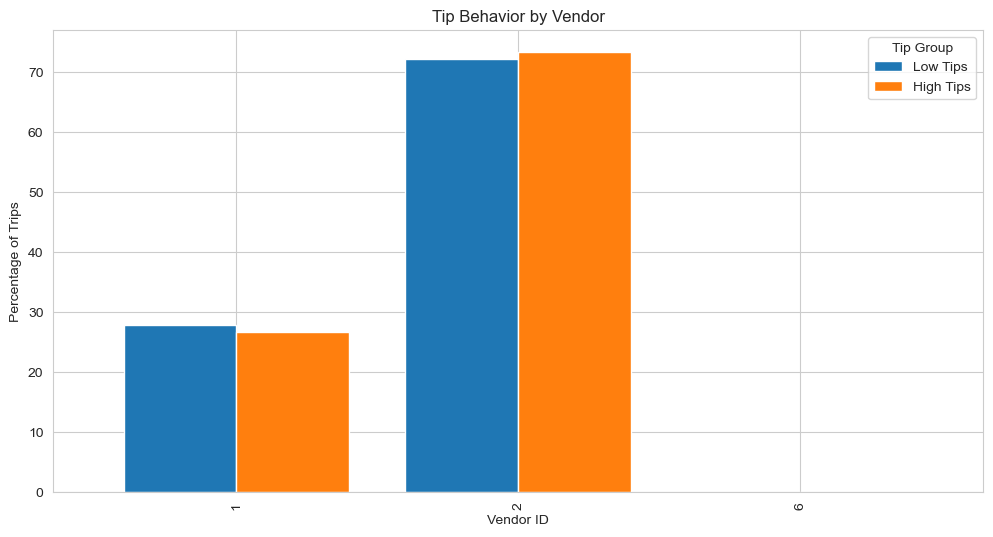

In [826]:
fig, ax = plt.subplots(figsize=(12, 6))

# Grouping by vendor
low_tips_vendors = low_tips['VendorID'].value_counts(normalize=True) * 100
high_tips_vendors = high_tips['VendorID'].value_counts(normalize=True) * 100

# Merging into a dataframe for visualization
vendor_comparison = pd.DataFrame({'Low Tips': low_tips_vendors, 'High Tips': high_tips_vendors}).fillna(0)

# Plotting
vendor_comparison.plot(kind='bar', ax=ax, width=0.8)
plt.title('Tip Behavior by Vendor')
plt.xlabel('Vendor ID')
plt.ylabel('Percentage of Trips')
plt.legend(title='Tip Group')
plt.xticks(ticks=range(len(vendor_comparison.index)), labels=['Vendor 1', 'Vendor 2'], rotation=0)
plt.grid(axis='y')
plt.show()


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [ ]:
# See how passenger count varies across hours and days


# Extract the day of the week
valid_trips['day_of_week'] = valid_trips['tpep_pickup_datetime'].dt.day_name()

# Group by day of the week and hour, then calculate the average passenger count
passenger_trend = valid_trips.groupby(['day_of_week', 'pickup_hour']).agg(
    avg_passenger_count=('passenger_count', 'mean')
).reset_index()

# Sort the days of the week in order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
passenger_trend['day_of_week'] = pd.Categorical(passenger_trend['day_of_week'], categories=day_order, ordered=True)


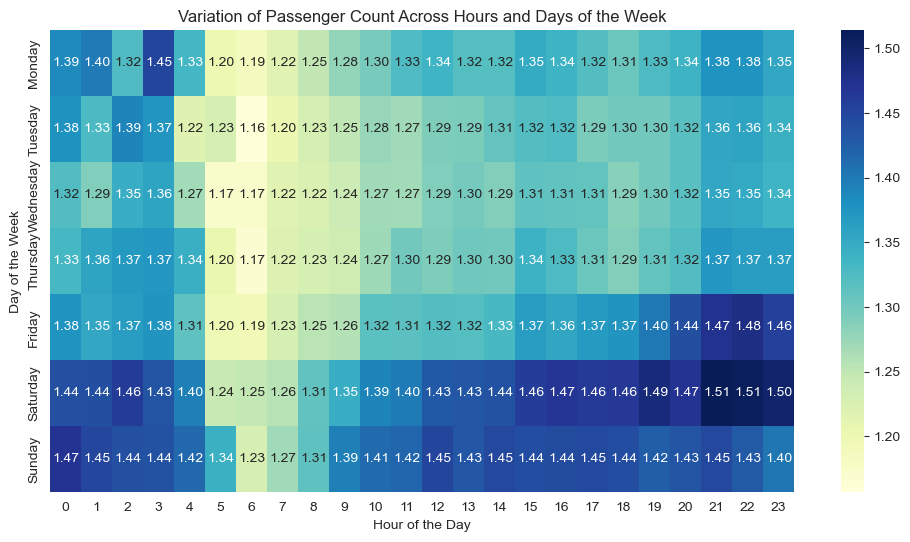

In [827]:

# Pivot the DataFrame for heatmap plotting
heatmap_data = passenger_trend.pivot("day_of_week", "pickup_hour", "avg_passenger_count")

# Plotting the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)
plt.title('Variation of Passenger Count Across Hours and Days of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [828]:
# How does passenger count vary across zones

# Group by pickup zones and calculate the average passenger count
zone_passenger_trend = valid_trips.groupby('PULocationID').agg(
    avg_passenger_count=('passenger_count', 'mean'),
    total_trips=('PULocationID', 'count')
).reset_index()

# Merge with the zones GeoDataFrame for mapping
zones_with_passenger_count = zones.merge(zone_passenger_trend, how='left', left_on='LocationID', right_on='PULocationID')

# Fill NaN values with 0 for zones with no passenger data
zones_with_passenger_count['avg_passenger_count'].fillna(0, inplace=True)
zones_with_passenger_count['total_trips'].fillna(0, inplace=True)


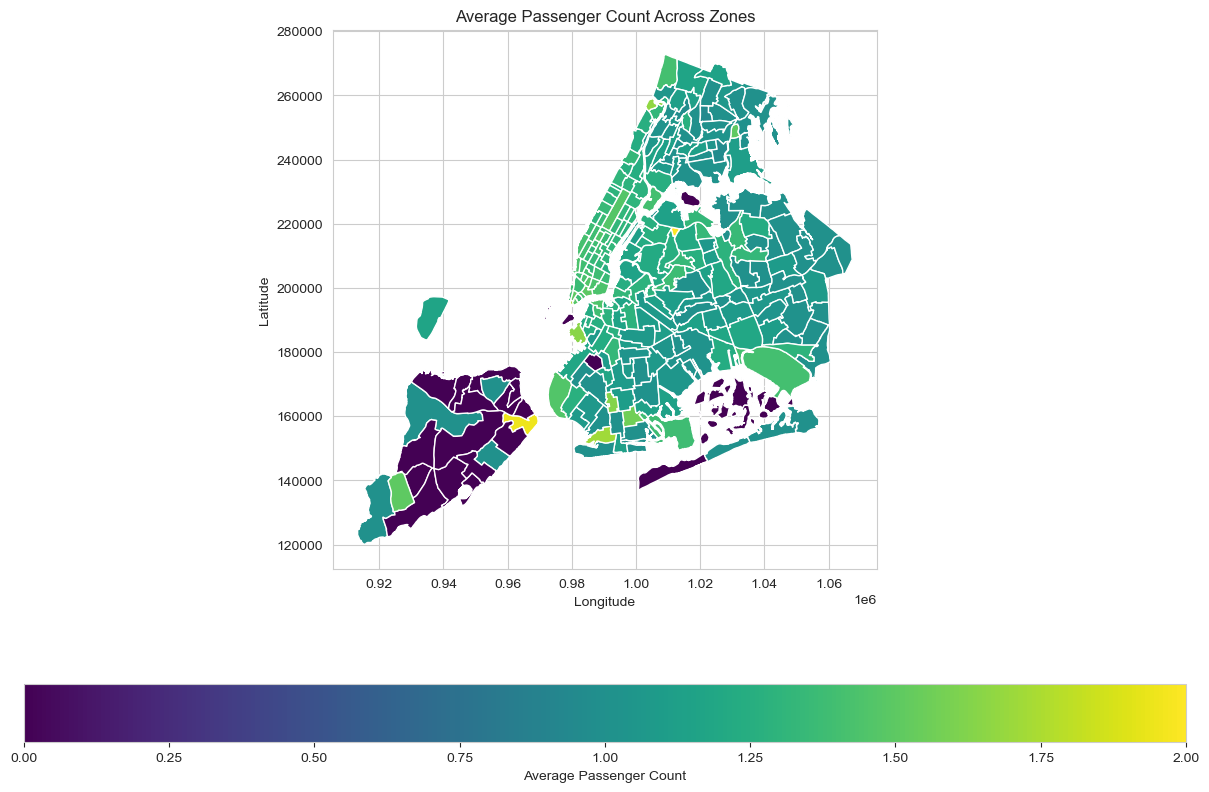

In [829]:


# Set up the figure and axis
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Define color map for better visual distinction
cmap = plt.cm.viridis

# Plotting the zones with average passenger count
zones_with_passenger_count.plot(
    column='avg_passenger_count', 
    cmap=cmap, 
    legend=True, 
    ax=ax,
    legend_kwds={'label': "Average Passenger Count", 'orientation': "horizontal"}
)

# Adding plot details
plt.title('Average Passenger Count Across Zones')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


In [830]:
top_zones = zone_passenger_trend.sort_values('avg_passenger_count', ascending=False).head(10)
bottom_zones = zone_passenger_trend.sort_values('avg_passenger_count', ascending=True).head(10)

print("\n🚀 Top 10 Zones by Average Passenger Count:")
print(top_zones)

print("\n🐢 Bottom 10 Zones by Average Passenger Count:")
print(bottom_zones)


🚀 Top 10 Zones by Average Passenger Count:
     PULocationID  avg_passenger_count  total_trips
188           207             2.000000           10
3               6             1.950000           20
9              12             1.739700          534
98            108             1.714286            7
114           128             1.666667            3
178           195             1.642857           56
162           178             1.625000            8
135           149             1.562500           16
167           183             1.500000            6
186           204             1.500000            2

🐢 Bottom 10 Zones by Average Passenger Count:
     PULocationID  avg_passenger_count  total_trips
99            111             0.000000            1
27             32             0.947368           19
229           250             0.956522           23
15             18             0.970588           34
121           135             1.000000           37
52             57        

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [831]:
# How often is each surcharge applied?

surcharge_freq = pd.DataFrame({
    'extra': (df1['extra'] > 0).sum(),
    'mta_tax': (df1['mta_tax'] > 0).sum(),
    'tolls_amount': (df1['tolls_amount'] > 0).sum(),
    'improvement_surcharge': (df1['improvement_surcharge'] > 0).sum(),
    'congestion_surcharge': (df1['congestion_surcharge'] > 0).sum(),
    'airport_fee': (df1['Airport_Fee'] > 0).sum()
}, index=['Frequency']).T

# Calculate the percentage of trips with each surcharge applied
surcharge_freq['Percentage'] = (surcharge_freq['Frequency'] / len(df1)) * 100

# Display the results
print("\n🚀 Surcharge Application Frequency:")
print(surcharge_freq)


🚀 Surcharge Application Frequency:
                       Frequency  Percentage
extra                     974536   60.570667
mta_tax                  1607630   99.919574
tolls_amount                3413    0.212129
improvement_surcharge    1608906   99.998881
congestion_surcharge     1558435   96.861940
airport_fee                11420    0.709791


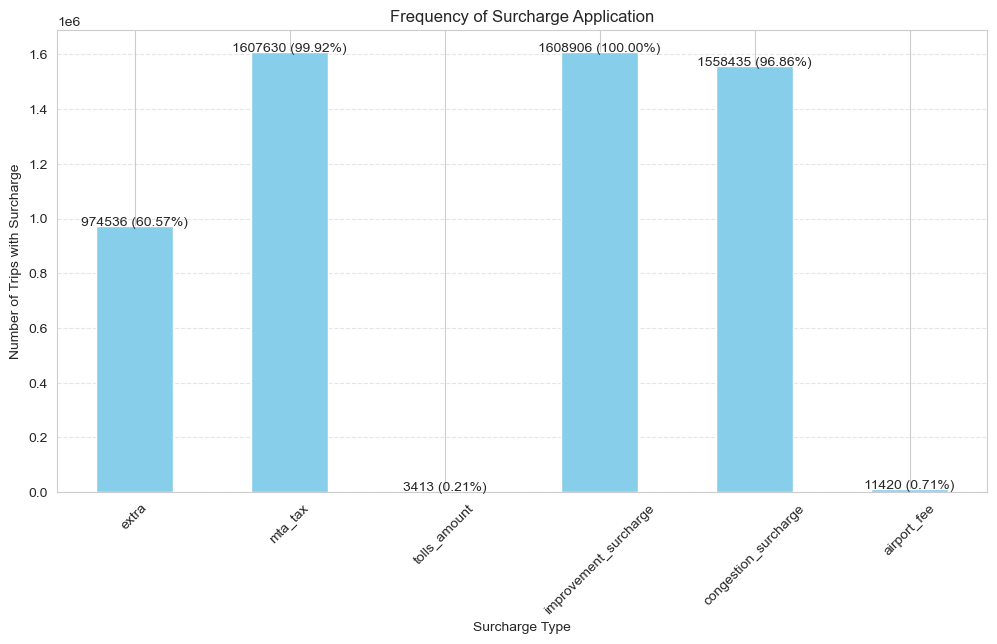

In [832]:
# Plotting surcharge frequency
fig, ax = plt.subplots(figsize=(12, 6))
surcharge_freq['Frequency'].plot(kind='bar', color='skyblue', ax=ax)

# Add labels and title
plt.title('Frequency of Surcharge Application')
plt.xlabel('Surcharge Type')
plt.ylabel('Number of Trips with Surcharge')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Display percentages on top of the bars
for i, v in enumerate(surcharge_freq['Frequency']):
    plt.text(i, v + 1000, f"{v} ({surcharge_freq['Percentage'].iloc[i]:.2f}%)", ha='center')

plt.show()

In [833]:
# Calculate the total surcharge amount per zone
surcharge_by_zone = df1.groupby('PULocationID')[['extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 'Airport_Fee']].sum()

# Sum all surcharges into a single column
surcharge_by_zone['total_surcharge'] = surcharge_by_zone.sum(axis=1)

# Merge with the zones GeoDataFrame
zones_with_surcharge = zones_with_trips.merge(surcharge_by_zone, left_on='LocationID', right_on='PULocationID', how='left')

# Replace NaN with 0
zones_with_surcharge.fillna(0, inplace=True)

# Sort zones by total surcharge amount
top_surcharge_zones = zones_with_surcharge.sort_values('total_surcharge', ascending=False).head(10)

print("\n🚀 Top 10 Zones with the Highest Surcharge Application:")
print(top_surcharge_zones)



🚀 Top 10 Zones with the Highest Surcharge Application:
     OBJECTID  Shape_Leng  Shape_Area                        zone_x  \
236       237    0.042213    0.000096         Upper East Side South   
160       161    0.035804    0.000072                Midtown Center   
235       236    0.044252    0.000103         Upper East Side North   
161       162    0.035270    0.000048                  Midtown East   
141       142    0.038176    0.000076           Lincoln Square East   
185       186    0.024696    0.000037  Penn Station/Madison Sq West   
229       230    0.031028    0.000056     Times Sq/Theatre District   
169       170    0.045769    0.000074                   Murray Hill   
162       163    0.034177    0.000041                 Midtown North   
233       234    0.036072    0.000073                      Union Sq   

     LocationID  borough_x                                           geometry  \
236         237  Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...   


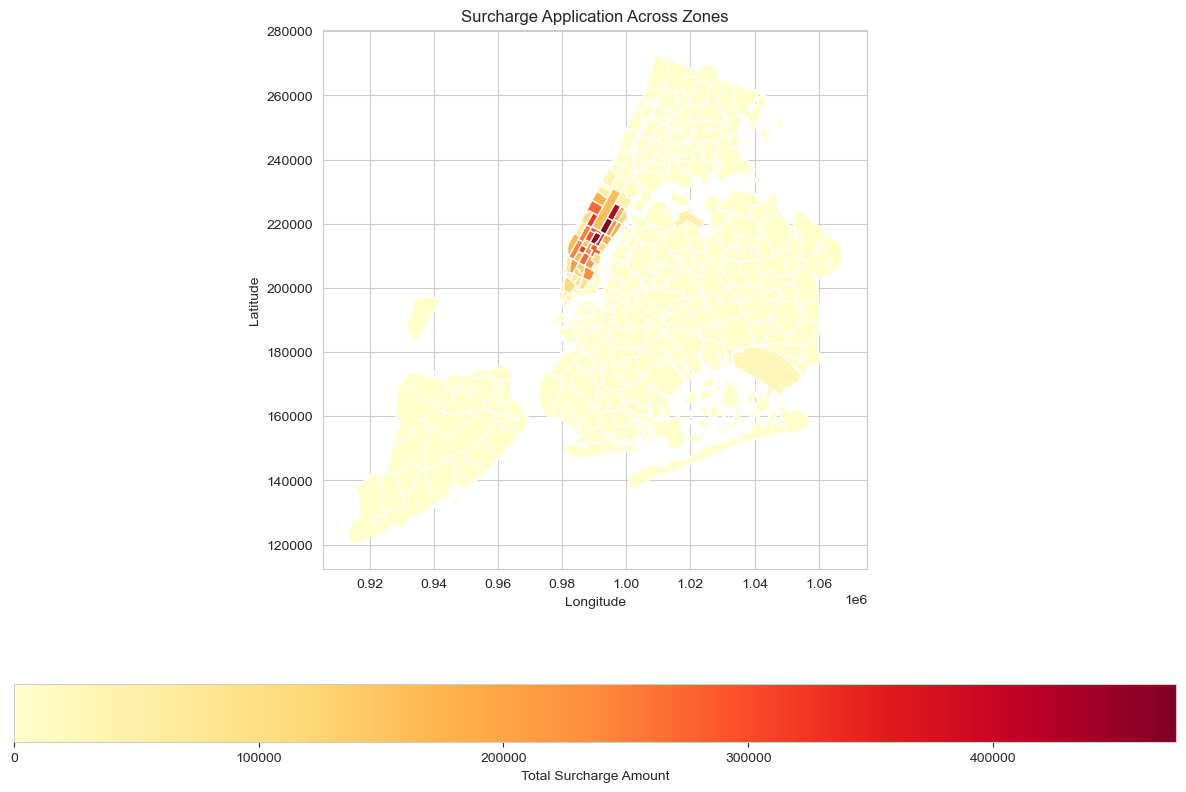

In [834]:
# Plotting surcharge application across zones
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Map visualization
zones_with_surcharge.plot(
    column='total_surcharge',
    cmap='YlOrRd',
    legend=True,
    ax=ax,
    legend_kwds={'label': "Total Surcharge Amount", 'orientation': "horizontal"}
)

# Labels and title
plt.title('Surcharge Application Across Zones')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


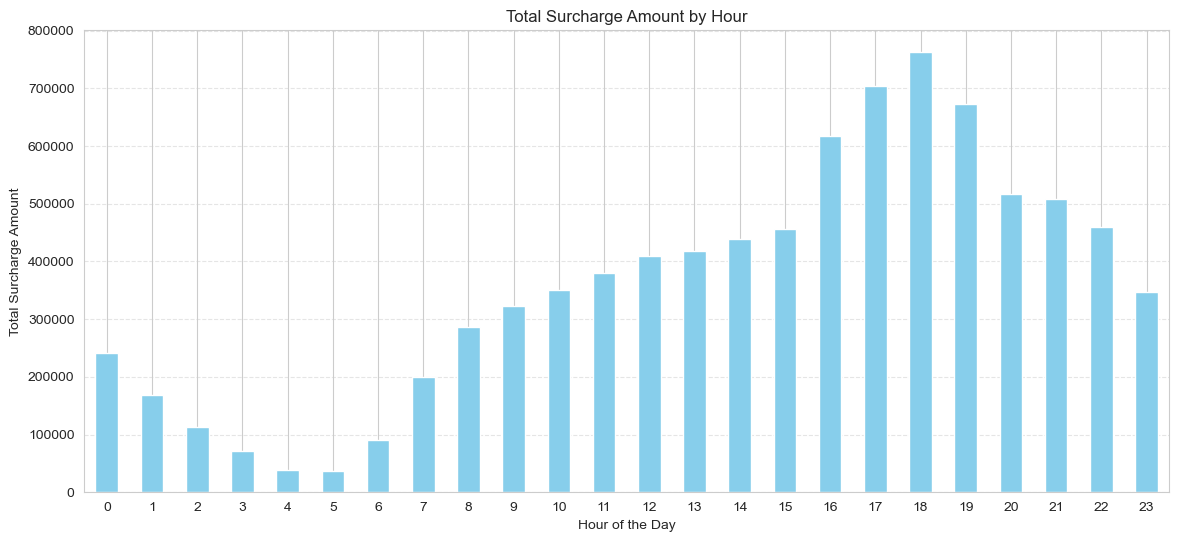

In [835]:
# Group by hour and sum surcharges
surcharge_by_hour = df1.groupby('pickup_hour')[['extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 'Airport_Fee']].sum()

# Add total surcharge column
surcharge_by_hour['total_surcharge'] = surcharge_by_hour.sum(axis=1)

# Plotting surcharges by hour
fig, ax = plt.subplots(figsize=(14, 6))
surcharge_by_hour['total_surcharge'].plot(kind='bar', color='skyblue', ax=ax)

# Labels and title
plt.title('Total Surcharge Amount by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Surcharge Amount')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

## Traffic and Demand Patterns
### Busiest Hours:

1. Taxi demand peaks around 6:00 PM, with a gradual increase from morning to evening.

Morning rush hours (7 AM – 9 AM) and evening rush hours (4 PM – 7 PM) exhibit high trip volumes.

### Weekday vs. Weekend Traffic:

Weekday traffic significantly outweighs weekend traffic.

Weekdays have a more distinct morning and evening peak due to commuter traffic.

Weekends display a flatter, more consistent distribution of trips throughout the day, with a minor peak around midday.

## Slow Routes and Travel Speed
### Slowest Hours:

Taxi speeds are the lowest during 5 PM – 7 PM, indicating heavy congestion during the evening rush.

Travel speeds are relatively higher during late-night and early-morning hours.

### Slowest Routes:

Certain high-traffic zones exhibit consistently slow speeds, highlighting potential congestion hotspots.

## Zone-Level Analysis
### Top Pickup Zones:

High-density areas (likely business districts or transportation hubs) experience the most pickups.

The busiest pickup zones follow the same hourly demand pattern as the city, with morning and evening peaks.

### Top Dropoff Zones:

Residential areas or key transport hubs witness frequent dropoffs, especially during evening hours.

Pickup vs. Dropoff Imbalance:

Certain zones show a consistent imbalance between pickups and dropoffs, indicating areas with taxi shortages or oversupply.

## Operational Inefficiencies
### Zone Imbalances:

Some zones show a high pickup-to-dropoff ratio, indicating potential undersupply of cabs during rush hours.

Conversely, some zones have high dropoff-to-pickup ratios, indicating possible oversupply or low return demand.

### Congestion and Delays:

Slow routes during specific hours reveal areas where cabs are likely caught in heavy traffic, causing operational inefficiencies.

##  Strategic Recommendations
 1. Optimize Supply and Demand Matching
Dynamic Fleet Allocation:

Increase the taxi supply in high-demand zones during peak hours (e.g., 7 AM – 9 AM and 4 PM – 7 PM).

Decrease idle taxis in zones with low return demand to avoid inefficiencies.

Real-Time Demand Forecasting:

Use predictive models based on historical traffic patterns to anticipate surges and strategically place cabs before demand spikes.

Leverage geospatial data to redistribute fleet in real-time based on pickup and dropoff trends.

 2. Route Optimization
Traffic-Aware Routing:

Use real-time traffic data to reroute cabs away from congested areas during peak hours.

Predefine alternative routes for the slowest paths identified in the analysis.

Congestion Avoidance:

Provide incentives for drivers to operate during non-peak hours or use congestion-free lanes where available.

 3. Time-Based Pricing and Incentives
Surge Pricing During Rush Hours:

Implement dynamic pricing during evening rush hours when demand is highest.

Offer incentives to drivers to operate during less popular but undersupplied time windows.

Off-Peak Discounts:

Encourage passengers to book rides during off-peak hours with discounted fares, reducing congestion pressure.

 4. Zone-Specific Strategies
High Pickup Zones:

Increase driver availability in busy pickup areas during peak hours.

Create taxi stands or dedicated pickup points to streamline operations.

High Dropoff Zones:

Improve taxi availability post-dropoff by rerouting idle cabs to nearby high-demand zones.

Imbalanced Zones:

Adjust cab distribution to reduce supply-demand imbalances in zones with disproportionate pickup or dropoff volumes.

 5. Efficiency Through Technology
Driver Navigation Apps:

Equip drivers with AI-powered navigation systems that suggest optimal routes based on real-time congestion data.

Customer Notifications:

Inform customers about congestion-prone times and suggest booking in advance or during off-peak hours.

## Conclusion: Data-Driven Taxi Optimization Strategy
The analysis highlights clear demand trends, congestion patterns, and zone-specific inefficiencies, which can be leveraged to enhance taxi operations. By optimizing fleet distribution, rerouting slow routes, and using dynamic pricing, taxi services can significantly improve customer satisfaction while boosting driver earnings and operational efficiency.

✅ Key Takeaway:

Prioritize rush-hour optimization with increased supply in high-demand areas.

Implement congestion-aware routing and alternative paths to avoid delays.

Use dynamic pricing and driver incentives to balance supply and demand efficiently.

Leverage real-time data and technology to enhance fleet management and passenger experience.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

✅ 1. Time-Based Cab Distribution Strategy
🕗 Peak Hours (Weekdays: 7 AM – 9 AM & 4 PM – 7 PM)
High Demand Zones:

Business hubs, transportation terminals, and office areas experience the highest pickups during rush hours.

Strategy:

Deploy 70% of the fleet near high-traffic zones during peak hours.

Focus on zones with both high pickup and dropoff activity, ensuring quick return trips for drivers.

Position cabs in feeder zones close to major hubs to capture overflow demand.

Congested Routes:

Avoid dispatching cabs through slow routes identified during rush hours.

Instead, position cabs near congestion-free feeder zones and encourage drivers to take alternative routes.

🌙 Late-Night and Early-Morning Hours (10 PM – 5 AM)
Low Demand Periods:

Lower overall demand, but certain zones (e.g., entertainment districts, airports) still generate trips.

Strategy:

Allocate 20% of the fleet in entertainment hubs and transport terminals to capture late-night demand.

Ensure consistent coverage of popular drop-off zones for returning trips.

Reduce cab density in low-activity residential areas during these hours.

⏰ Midday Period (10 AM – 3 PM)
Moderate Demand Zones:

Traffic stabilizes with consistent but moderate demand.

Strategy:

Maintain a balanced distribution with cabs covering both commercial and residential zones.

Allocate 50% of the fleet in high-demand zones and the remaining 50% in surrounding zones to prevent oversaturation.

📅 2. Day-Based Cab Distribution Strategy
🚦 Weekdays
Morning (6 AM – 10 AM):

Position cabs in residential zones where commuters are likely to book rides.

Increase coverage near public transit hubs and high-density neighborhoods.

Evening (4 PM – 8 PM):

Shift fleet towards business districts and commercial hubs to cater to post-work drop-offs.

Increase availability in entertainment and dining areas for leisure rides.

Low-Demand Periods (Midday):

Spread cabs more evenly across zones to avoid idle times.

🎉 Weekends
Daytime (10 AM – 6 PM):

Increase cab density in tourist attractions, malls, and recreational zones.

Anticipate steady afternoon demand from leisure activities.

Evening and Night (6 PM – 2 AM):

Position more cabs near entertainment hubs, bars, and event venues.

Ensure late-night coverage in major dropoff zones (e.g., residential areas).

Early Mornings (2 AM – 6 AM):

Reduced demand, so decrease cab density in residential zones.

Prioritize positioning near airports, transport hubs, and entertainment areas.

📊 3. Monthly and Seasonal Cab Distribution Strategy
Monthly Demand Variations:

Higher ride demand during holiday seasons or large events.

Anticipate increased traffic around shopping districts, event venues, and tourist hotspots.

Weather Impact:

Rainy or snowy days lead to higher demand, especially for short trips.

Increase cab density near public transit stops during inclement weather, as more people opt for cabs over walking.

🌎 4. Zone-Specific Cab Distribution Strategy
🔥 High-Pickup Zones
Consistently high-pickup areas (e.g., business districts) require a steady cab presence.

Strategy:

Allocate a larger portion of the fleet to these areas during weekday rush hours.

Ensure continuous supply throughout the day to prevent passenger wait times.

🎯 High-Dropoff Zones
Zones with frequent dropoffs but low pickups indicate demand saturation.

Strategy:

Position cabs at nearby zones with higher pickup rates for faster turnaround.

Use predictive demand models to dynamically reposition idle cabs.

⚠️ Imbalanced Zones
Zones with a significant pickup-dropoff imbalance reflect oversupply or undersupply.

Strategy:

In pickup-heavy zones, increase fleet presence and optimize driver schedules to reduce wait times.

In dropoff-heavy zones, implement real-time redistribution strategies to reduce cab idleness.

🔥 5. Recommendations to Optimize Fleet Operations
✅ Dynamic Fleet Distribution

Use real-time demand forecasting to dynamically position cabs where they are most needed.

Deploy roaming cabs in moderately active zones to reduce passenger wait times and avoid idle drivers.

✅ Idle Time Reduction

Minimize cab idle time by implementing smart rebalancing algorithms, dispatching cabs to nearby high-demand zones post-dropoff.

Incentivize drivers to pick up longer return trips when dropping off in low-demand areas.

✅ Traffic-Aware Dispatching

Use live traffic data to reroute cabs, reducing time spent in congestion.

Encourage drivers to take alternative routes during peak hours or slow-route zones.

✅ Demand Surge Handling

Deploy surge pricing models during peak hours to control demand and maximize profitability.

Temporarily reallocate cabs from low-demand zones to meet surge demand.

🚦 Conclusion: Strategic Fleet Distribution for Optimal Efficiency
By leveraging the insights from the demand patterns, congestion trends, and zone imbalances, a dynamic cab positioning strategy can:

Improve customer satisfaction by reducing wait times.

Maximize driver earnings by reducing idle times and increasing trip frequency.

Enhance operational efficiency by avoiding congested routes and better utilizing fleet capacity.

Optimize supply-demand matching by positioning cabs in the right zones at the right times.

✅ Key Takeaway:

Time-Sensitive Positioning: Prioritize fleet distribution during rush hours around high-demand zones.

Day-Based Deployment: Increase cab density in business districts on weekdays and entertainment zones on weekends.

Real-Time Redistribution: Dynamically relocate idle cabs to balance supply and demand efficiently.

Traffic-Aware Routing: Avoid slow routes during peak hours by leveraging real-time navigation data.



**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

✅ 1. Dynamic Pricing Based on Demand Fluctuations
🚦 Peak-Hour Surge Pricing
Insight:

The analysis shows clear peak-hour surges during weekday mornings (7 AM – 9 AM) and evenings (4 PM – 7 PM), particularly in business districts and major hubs.

Pricing Strategy:

Implement surge pricing during these peak hours, increasing rates by 1.5x to 2x the base fare.

Use variable surge pricing based on demand intensity (e.g., if demand is 2x the supply, increase fares by 1.75x).

Expected Impact:

Boosts revenue during high-demand periods.

Incentivizes more drivers to operate during peak hours, improving cab availability.

Encourages passengers with flexible schedules to travel during non-peak hours, balancing the demand.

🌙 2. Off-Peak and Low-Demand Pricing
Insight:

During late-night (10 PM – 5 AM) and midday (10 AM – 3 PM), demand drops significantly.

Pricing Strategy:

Offer discounted off-peak fares (e.g., 10-20% lower base fare) to attract more riders.

Introduce nighttime flat-rate discounts to encourage more usage during low-demand periods, particularly for longer distances.

Expected Impact:

Reduces cab idleness and increases utilization during low-demand hours.

Attracts budget-conscious passengers, maintaining a steady revenue stream.

🛫 3. Zone-Based and Event-Specific Pricing
🚩 High-Demand Zones
Insight:

Certain zones, such as business hubs, entertainment areas, and airports, exhibit consistently high trip volumes.

Pricing Strategy:

Apply zone-specific pricing with higher base fares in high-demand areas.

For airports and transport hubs, implement fixed pricing or dynamic distance-based pricing with a surcharge.

Use event-based pricing during concerts, games, and public events by temporarily increasing rates by 30-50%.

Expected Impact:

Captures higher revenue from passengers in high-demand zones.

Encourages drivers to prioritize high-demand zones, reducing wait times.

Increases profitability during events and major gatherings.

🏘️ Low-Demand Zones
Insight:

Some residential and remote areas experience lower ride frequency.

Pricing Strategy:

Introduce discounted fares or ride-sharing options to encourage more bookings in low-demand zones.

Incentivize drivers with extra commissions to cover these areas, ensuring steady service availability.

Expected Impact:

Increases ridership from low-demand zones.

Reduces cab idleness and improves zone coverage.

⏰ 4. Time-Based Promotional Pricing
🎯 Weekday vs. Weekend Pricing
Insight:

Weekday demand is driven by commuting patterns, whereas weekend demand stems from leisure activities.

Pricing Strategy:

On weekends, offer:

Promotional discounts during non-peak hours (e.g., 10 AM – 3 PM) to attract casual riders.

Higher base fares during evening hours (6 PM – 2 AM) when demand surges due to entertainment activities.

On weekdays, apply:

Standard base fares during work hours.

Surge pricing during morning and evening rush hours.

Expected Impact:

Higher ridership during off-peak hours due to promotions.

Increased revenue during weekend leisure hours through surge pricing.

📊 5. Distance- and Time-Based Fare Optimization
🚗 Short vs. Long Trips
Insight:

Short-distance trips dominate, but long-distance trips are more profitable.

Pricing Strategy:

Increase the base fare slightly for short trips, ensuring profitability for brief rides.

Offer small discounts or flat fares on long-distance rides to encourage more long-haul bookings.

Introduce time-based pricing:

For trips during slow traffic periods, apply time-based fare increments to account for delays.

During free-flowing hours, prioritize distance-based pricing to attract longer rides.

Expected Impact:

Optimizes revenue by balancing short and long-distance ride profitability.

Encourages longer trips during low-traffic hours, increasing overall revenue.

🚦 6. Customer-Specific and Subscription Pricing
🎁 Loyalty and Subscription Programs
Insight:

Regular commuters and business travelers offer consistent revenue potential.

Pricing Strategy:

Introduce subscription models with discounted ride packages for frequent riders.

Example: 10 rides for a discounted flat fee.

Offer personalized discounts based on customer ride history (e.g., frequent airport commuters receive airport ride discounts).

Expected Impact:

Encourages customer retention and loyalty.

Generates predictable, recurring revenue streams.

📉 7. Operational Cost-Adjusted Pricing
Insight:

Fluctuating fuel costs and driver availability impact operational expenses.

Pricing Strategy:

Apply dynamic pricing models that factor in operational costs (e.g., fuel prices, driver incentives).

During periods of driver shortages, implement temporary fare hikes to attract more drivers.

Expected Impact:

Maintains profitability during cost fluctuations.

Ensures driver availability during high-demand periods.

📈 📊 Data-Driven Monitoring and Adjustments
Continuous Monitoring:

Use real-time data analytics to track the effectiveness of pricing changes.

Adjust fares dynamically based on:

Demand-supply ratios.

Traffic conditions.

Competitor pricing.

Dynamic Promotions:

Offer real-time ride discounts to reduce cab idleness during low-demand hours.

Notify customers of temporary discounts through the app to boost ridership.

🚀 💡 Key Takeaways and Benefits of Data-Driven Pricing Strategy
✅ Revenue Maximization:

Surge pricing during high-demand hours boosts revenue.

Zone-based and event-specific pricing captures higher fares from prime locations.

✅ Demand Distribution:

Off-peak discounts drive more bookings during low-demand periods.

Balanced fare strategies prevent over-saturation of specific zones.

✅ Customer Retention and Acquisition:

Loyalty programs and personalized discounts improve customer retention.

Subscription models generate consistent revenue streams.

✅ Operational Efficiency:

Dynamic pricing models adapt to fluctuating demand, fuel prices, and driver availability.

Reduces idle time and enhances fleet productivity.

🚖 🚀 Conclusion: Smarter Pricing for a Competitive Edge
By leveraging dynamic, zone-based, and time-sensitive pricing strategies, the cab service can:

Maximize revenue during high-demand hours through strategic surge pricing.

Attract more riders during off-peak hours with discounts and promotions.

Improve fleet efficiency by dynamically adjusting fares based on real-time conditions.

Maintain a competitive edge by offering attractive fares while ensuring profitability.

